In [60]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import csv
from networkx.algorithms import community as comx
from pandas.errors import EmptyDataError 
%matplotlib inline
import community

In [61]:
G=nx.DiGraph()

In [62]:
data=pd.read_csv("librarystats.csv")
data.head()
df=pd.DataFrame(data)
df.head()

Unnamed: 0                          Name    Instagram user  Followers  \
0           0              British Library     britishlibrary     379586   
1           1          Library of Congress    librarycongress     155115   
2           2      New York Public Library               nypl     506012   
3           3  Library and Archives Canada    libraryarchives      13237   
4           4        Russian State Library   leninka_official      14046   

   Following  Mediacount  Hashtagged  number of vistors per year(million)  \
0        189        1995       70947                                  1.6   
1         27        2013         914                                  1.9   
2        478        4361      172956                                 16.0   
3        395         270        1569                                  2.8   
4        384        1516        1081                                  0.8   

       Funding Provider  Access                 Type  
0  Government/State Run     NaN  Academic/Scientific  
1  Government/State Run     NaN  Academic/Scientific  
2  Government/State Run     NaN              General  
3  Government/State Run     NaN  Academic/Scientific  
4  Government/State Run     NaN  Academic/Scientific

In [63]:
df["Instagram user"][0]
df.shape[0]

68

C:\Users\Aditi\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


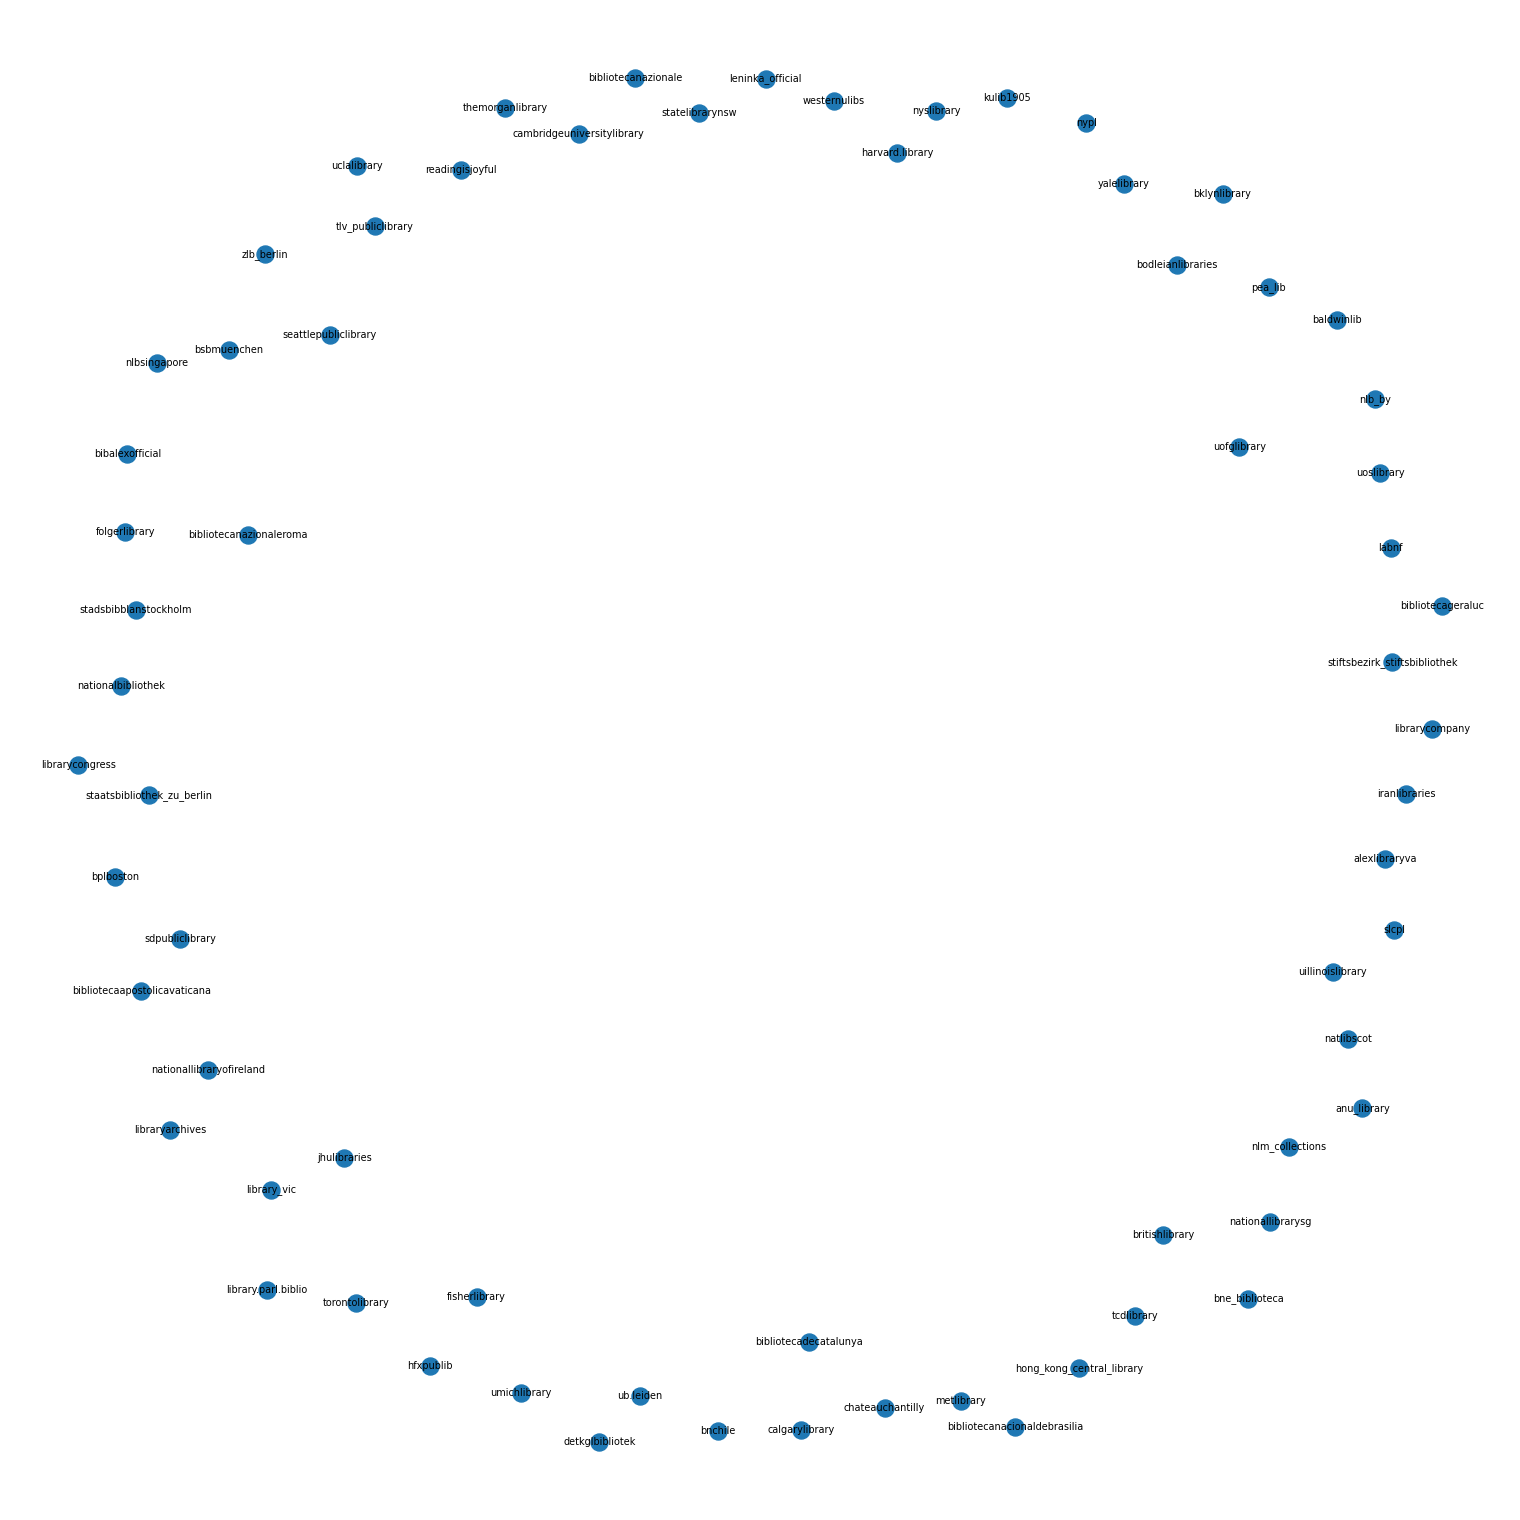

In [64]:
for i in range(0,df.shape[0]):
    G.add_node(df["Instagram user"][i])
    
plt.rcParams["figure.figsize"] = [15, 15]
plt.rcParams["figure.autolayout"] = True


#fig = plt.figure(6, figsize=(200, 200))
#fig=plt.figure(figsize=(200,200))
nx.draw(G,with_labels=True,node_size=150,font_size=7)
plt.show()

In [65]:
def adding(df,libname):
    df.insert(len(df.columns),"{lname}".format(lname=libname),0)
    return df
    
df_follows=df.copy()

for i in range(0,df.shape[0]):
    df_follows=adding(df_follows,df.iloc[i,1])

In [ ]:
list(df_follows.columns.values)

In [66]:
df_follows.drop(['Followers','Following','Mediacount','Hashtagged','number of vistors per year(million)','Funding Provider','Access','Type'],axis=1,inplace=True)
df_follows

Unnamed: 0                           Name    Instagram user  \
0            0               British Library     britishlibrary   
1            1           Library of Congress    librarycongress   
2            2       New York Public Library               nypl   
3            3   Library and Archives Canada    libraryarchives   
4            4         Russian State Library   leninka_official   
..         ...                            ...               ...   
63          64         Toronto Public Library    torontolibrary   
64          65              Western Libraries      westernulibs   
65          66  University Of Glasgow Library       uofglibrary   
66          67   National Library of Scotland        natlibscot   
67          68                   UCLA Library       uclalibrary   

    British Library   Library of Congress   New York Public Library   \
0                  0                     0                         0   
1                  0                     0                         0   
2                  0                     0                         0   
3                  0                     0                         0   
4                  0                     0                         0   
..               ...                   ...                       ...   
63                 0                     0                         0   
64                 0                     0                         0   
65                 0                     0                         0   
66                 0                     0                         0   
67                 0                     0                         0   

    Library and Archives Canada   Russian State Library   \
0                              0                       0   
1                              0                       0   
2                              0                       0   
3                              0                       0   
4                              0                       0   
..                           ...                     ...   
63                             0                       0   
64                             0                       0   
65                             0                       0   
66                             0                       0   
67                             0                       0   

    Royal Library Denmark   Bibliotheque nationale de Fr  \
0                        0                             0   
1                        0                             0   
2                        0                             0   
3                        0                             0   
4                        0                             0   
..                     ...                           ...   
63                       0                             0   
64                       0                             0   
65                       0                             0   
66                       0                             0   
67                       0                             0   

    University of Illinois Library   Bavarian State Library   \
0                                 0                        0   
1                                 0                        0   
2                                 0                        0   
3                                 0                        0   
4                                 0                        0   
..                              ...                      ...   
63                                0                        0   
64                                0                        0   
65                                0                        0   
66                                0                        0   
67                                0                        0   

    Biblioteca Nacional de Espana  Berlin State Library   \
0                               0                      0   
1  

In [67]:

def follows(df,column_name,column_number):
    try:
        col_data=pd.read_csv("{lname}.csv".format(lname=column_name),header=None)
        coldf=pd.DataFrame(col_data)
        size=coldf.shape[0]
        for i in range(0,size):
            following=coldf.iloc[i,0]
            if following in list(df.iloc[:,2]):
                index=list(df.iloc[:,2]).index("{fl}".format(fl=following))
                df.iloc[index,column_number]=1
    except EmptyDataError:
        pass
    except FileNotFoundError:
        pass

count=3
for column in df_follows.columns[3:]:
    #print(column)
   #print(count)
    follows(df_follows,column,count)
    count=count+1    

In [68]:
df_follows.shape

(68, 71)

In [69]:
#if "britishelibrary" in list(df.iloc[:,2]):
    #print("yes")
#else:
    #print("no")
    
    
#df.index[df['BoolCol'] == True].tolist()
#index=list(df.iloc[:,2]).index("nypl")
#index

#df_follows.iloc[2,3]
#df_follows.iloc[2,3]=0
#df_follows

pd.set_option("display.max_columns",None)
df_follows

Unnamed: 0                           Name    Instagram user  \
0            0               British Library     britishlibrary   
1            1           Library of Congress    librarycongress   
2            2       New York Public Library               nypl   
3            3   Library and Archives Canada    libraryarchives   
4            4         Russian State Library   leninka_official   
..         ...                            ...               ...   
63          64         Toronto Public Library    torontolibrary   
64          65              Western Libraries      westernulibs   
65          66  University Of Glasgow Library       uofglibrary   
66          67   National Library of Scotland        natlibscot   
67          68                   UCLA Library       uclalibrary   

    British Library   Library of Congress   New York Public Library   \
0                  0                     0                         1   
1                  1                     0                         1   
2                  1                     1                         0   
3                  0                     0                         0   
4                  0                     0                         0   
..               ...                   ...                       ...   
63                 0                     0                         1   
64                 0                     0                         0   
65                 1                     0                         1   
66                 1                     0                         1   
67                 0                     0                         1   

    Library and Archives Canada   Russian State Library   \
0                              0                       1   
1                              0                       1   
2                              0                       1   
3                              0                       0   
4                              0                       0   
..                           ...                     ...   
63                             1                       0   
64                             0                       0   
65                             0                       0   
66                             0                       1   
67                             0                       0   

    Royal Library Denmark   Bibliotheque nationale de Fr  \
0                        1                             1   
1                        0                             1   
2                        0                             0   
3                        0                             0   
4                        0                             0   
..                     ...                           ...   
63                       0                             0   
64                       0                             0   
65                       0                             0   
66                       0                             0   
67                       0                             0   

    University of Illinois Library   Bavarian State Library   \
0                                 0                        1   
1                                 1                        0   
2                                 0                        1   
3                                 0                        0   
4                                 0                        0   
..                              ...                      ...   
63                                0                        0   
64                                0                        0   
65                                0                        0   
66                                0                        0   
67                                0                        0   

    Biblioteca Nacional de Espana  Berlin State Library   \
0                               1                      1   
1  

In [70]:
#adding edges:
for i in range(3,df_follows.shape[1]):
    for j in range(0,df_follows.shape[0]):
        if df_follows.iloc[j,i]==1:
            username=i-3
            G.add_edges_from([(df_follows.iloc[username,2],df_follows.iloc[j,2])])
    


C:\Users\Aditi\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


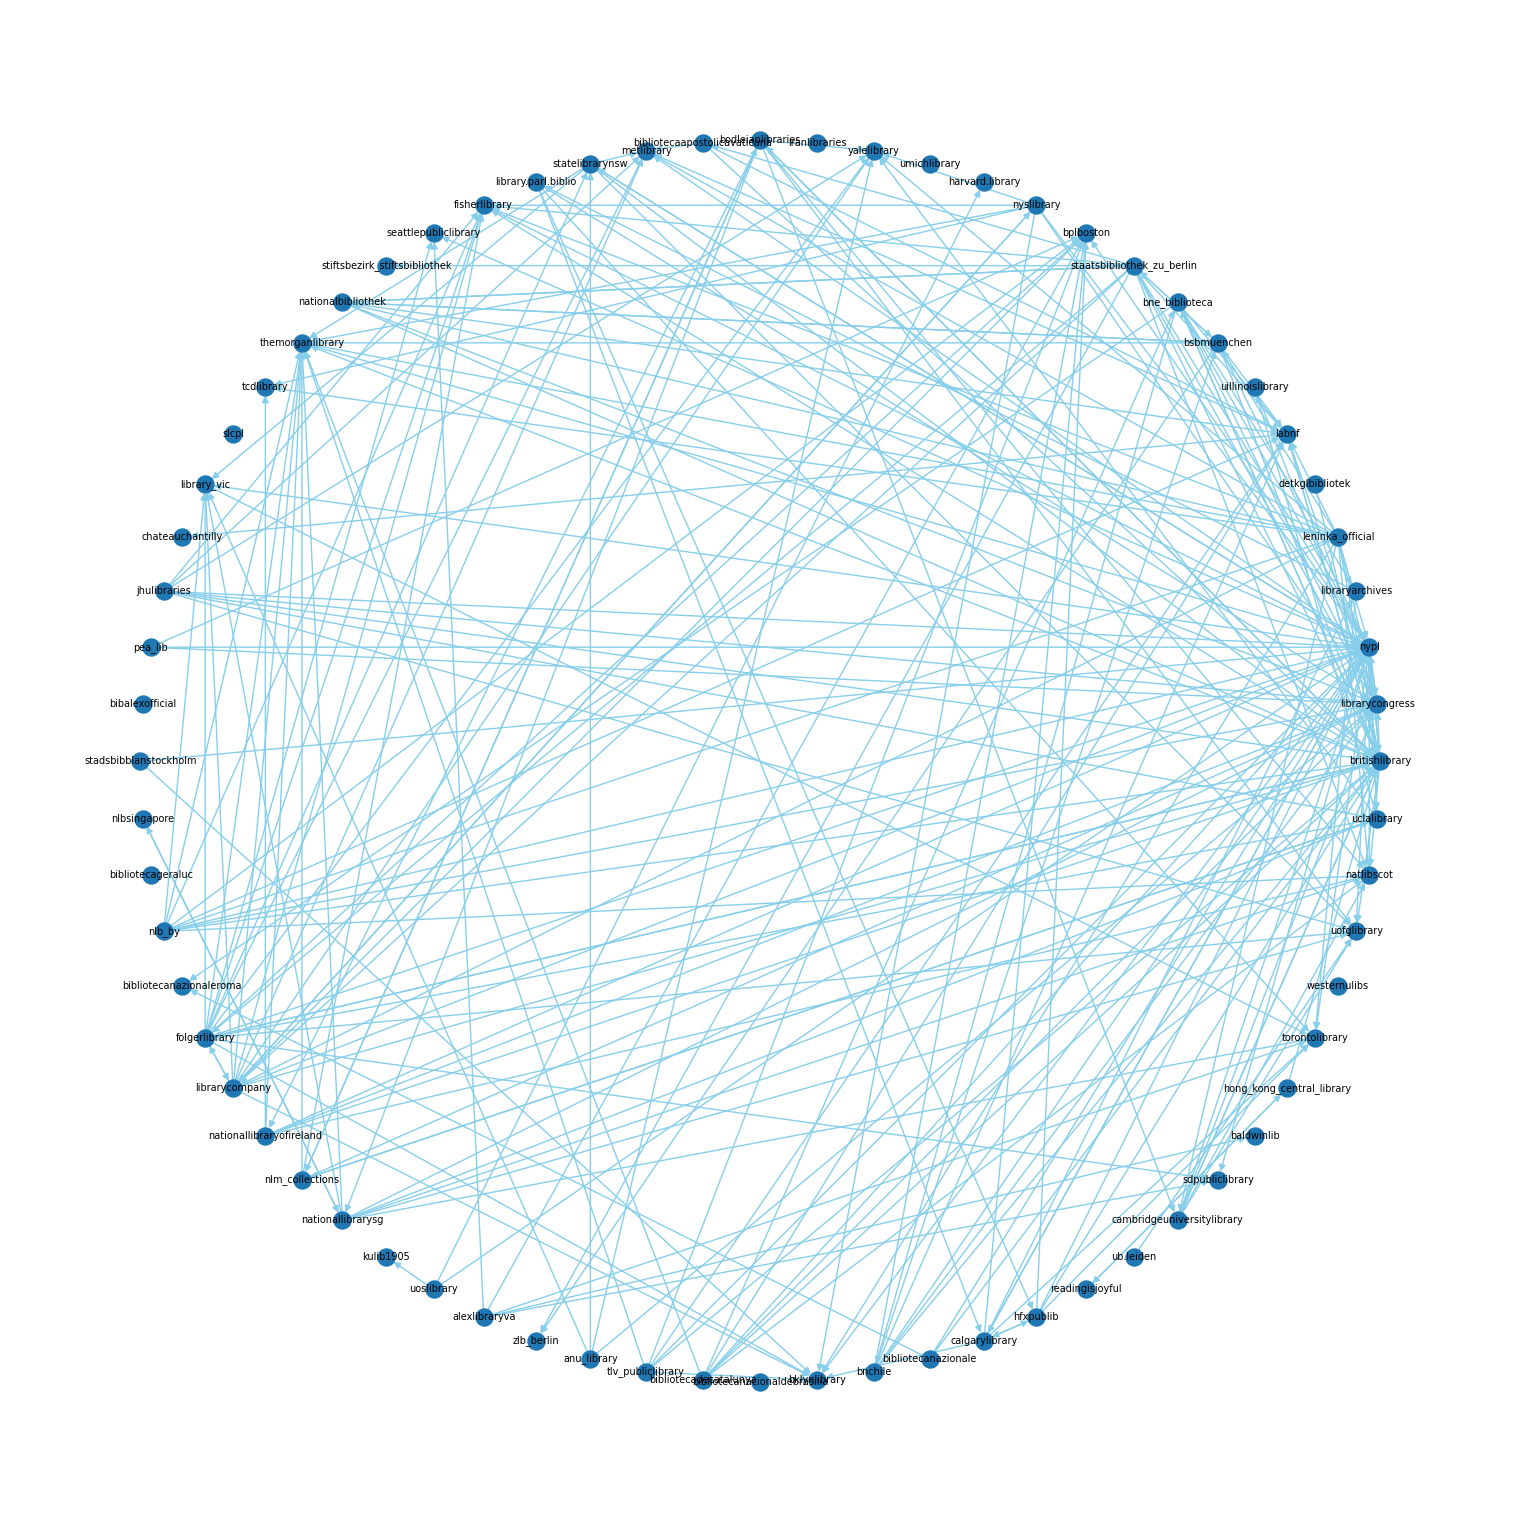

In [71]:
#nx.draw_circular(G,with_labels=True,node_size=150,font_size=7)
nx.draw_circular(G,with_labels=True,node_size=150,font_size=7,edge_color="skyblue")

In [72]:
G.out_degree()

out_degree=list(G.out_degree)
out_degree
#len(out_degree)

[('britishlibrary', 11),
 ('librarycongress', 1),
 ('nypl', 16),
 ('libraryarchives', 2),
 ('leninka_official', 15),
 ('detkglbibliotek', 1),
 ('labnf', 4),
 ('uillinoislibrary', 1),
 ('bsbmuenchen', 7),
 ('bne_biblioteca', 7),
 ('staatsbibliothek_zu_berlin', 13),
 ('bplboston', 0),
 ('nyslibrary', 8),
 ('harvard.library', 0),
 ('umichlibrary', 0),
 ('yalelibrary', 0),
 ('iranlibraries', 0),
 ('bodleianlibraries', 8),
 ('bibliotecaapostolicavaticana', 3),
 ('metlibrary', 0),
 ('statelibrarynsw', 6),
 ('library.parl.biblio', 4),
 ('fisherlibrary', 0),
 ('seattlepubliclibrary', 0),
 ('stiftsbezirk_stiftsbibliothek', 0),
 ('nationalbibliothek', 5),
 ('themorganlibrary', 0),
 ('tcdlibrary', 0),
 ('slcpl', 0),
 ('library_vic', 1),
 ('chateauchantilly', 0),
 ('jhulibraries', 8),
 ('pea_lib', 3),
 ('bibalexofficial', 0),
 ('stadsbibblanstockholm', 2),
 ('nlbsingapore', 1),
 ('bibliotecageraluc', 0),
 ('nlb_by', 10),
 ('bibliotecanazionaleroma', 0),
 ('folgerlibrary', 14),
 ('librarycompany', 

In [73]:
G.in_degree()

in_degree=list(G.in_degree())
in_degree

[('britishlibrary', 23),
 ('librarycongress', 20),
 ('nypl', 24),
 ('libraryarchives', 2),
 ('leninka_official', 1),
 ('detkglbibliotek', 0),
 ('labnf', 11),
 ('uillinoislibrary', 1),
 ('bsbmuenchen', 4),
 ('bne_biblioteca', 2),
 ('staatsbibliothek_zu_berlin', 2),
 ('bplboston', 10),
 ('nyslibrary', 1),
 ('harvard.library', 1),
 ('umichlibrary', 0),
 ('yalelibrary', 8),
 ('iranlibraries', 0),
 ('bodleianlibraries', 2),
 ('bibliotecaapostolicavaticana', 1),
 ('metlibrary', 8),
 ('statelibrarynsw', 3),
 ('library.parl.biblio', 1),
 ('fisherlibrary', 10),
 ('seattlepubliclibrary', 3),
 ('stiftsbezirk_stiftsbibliothek', 1),
 ('nationalbibliothek', 3),
 ('themorganlibrary', 14),
 ('tcdlibrary', 3),
 ('slcpl', 0),
 ('library_vic', 7),
 ('chateauchantilly', 1),
 ('jhulibraries', 0),
 ('pea_lib', 0),
 ('bibalexofficial', 0),
 ('stadsbibblanstockholm', 0),
 ('nlbsingapore', 1),
 ('bibliotecageraluc', 0),
 ('nlb_by', 0),
 ('bibliotecanazionaleroma', 2),
 ('folgerlibrary', 4),
 ('librarycompany',

In [74]:
idc=nx.in_degree_centrality(G)
idc

{'britishlibrary': 0.34328358208955223,
 'librarycongress': 0.29850746268656714,
 'nypl': 0.3582089552238806,
 'libraryarchives': 0.029850746268656716,
 'leninka_official': 0.014925373134328358,
 'detkglbibliotek': 0.0,
 'labnf': 0.16417910447761194,
 'uillinoislibrary': 0.014925373134328358,
 'bsbmuenchen': 0.05970149253731343,
 'bne_biblioteca': 0.029850746268656716,
 'staatsbibliothek_zu_berlin': 0.029850746268656716,
 'bplboston': 0.14925373134328357,
 'nyslibrary': 0.014925373134328358,
 'harvard.library': 0.014925373134328358,
 'umichlibrary': 0.0,
 'yalelibrary': 0.11940298507462686,
 'iranlibraries': 0.0,
 'bodleianlibraries': 0.029850746268656716,
 'bibliotecaapostolicavaticana': 0.014925373134328358,
 'metlibrary': 0.11940298507462686,
 'statelibrarynsw': 0.04477611940298507,
 'library.parl.biblio': 0.014925373134328358,
 'fisherlibrary': 0.14925373134328357,
 'seattlepubliclibrary': 0.04477611940298507,
 'stiftsbezirk_stiftsbibliothek': 0.014925373134328358,
 'nationalbiblio

In [75]:
type(nx.in_degree_centrality(G))
mxm=max(zip(idc.values(),idc.keys()))[1]
mnm=min(zip(idc.values(),idc.keys()))[1]
mxm,mnm

('nypl', 'alexlibraryva')

In [76]:
odc=nx.out_degree_centrality(G)
odc

{'britishlibrary': 0.16417910447761194,
 'librarycongress': 0.014925373134328358,
 'nypl': 0.23880597014925373,
 'libraryarchives': 0.029850746268656716,
 'leninka_official': 0.22388059701492538,
 'detkglbibliotek': 0.014925373134328358,
 'labnf': 0.05970149253731343,
 'uillinoislibrary': 0.014925373134328358,
 'bsbmuenchen': 0.1044776119402985,
 'bne_biblioteca': 0.1044776119402985,
 'staatsbibliothek_zu_berlin': 0.19402985074626866,
 'bplboston': 0.0,
 'nyslibrary': 0.11940298507462686,
 'harvard.library': 0.0,
 'umichlibrary': 0.0,
 'yalelibrary': 0.0,
 'iranlibraries': 0.0,
 'bodleianlibraries': 0.11940298507462686,
 'bibliotecaapostolicavaticana': 0.04477611940298507,
 'metlibrary': 0.0,
 'statelibrarynsw': 0.08955223880597014,
 'library.parl.biblio': 0.05970149253731343,
 'fisherlibrary': 0.0,
 'seattlepubliclibrary': 0.0,
 'stiftsbezirk_stiftsbibliothek': 0.0,
 'nationalbibliothek': 0.07462686567164178,
 'themorganlibrary': 0.0,
 'tcdlibrary': 0.0,
 'slcpl': 0.0,
 'library_vic':

In [77]:
mxmodc=max(zip(odc.values(),odc.keys()))[1]
mnmodc=min(zip(odc.values(),idc.keys()))[1]
mxmodc,mnmodc

('nypl', 'baldwinlib')

In [78]:
bc=nx.betweenness_centrality(G)
mxmbc=max(zip(bc.values(),bc.keys()))[1]
mnmbc=min(zip(bc.values(),bc.keys()))[1]
mxmbc,mnmbc

('britishlibrary', 'alexlibraryva')

In [80]:
communities_generator = comx.girvan_newman(G)

top_level_communities = next(communities_generator)

len(top_level_communities)

next_level_communities = next(communities_generator)

sorted(map(sorted, next_level_communities))

[['alexlibraryva',
  'anu_library',
  'baldwinlib',
  'bibliotecaapostolicavaticana',
  'bibliotecadecatalunya',
  'bibliotecanazionale',
  'bibliotecanazionaleroma',
  'bklynlibrary',
  'bnchile',
  'bne_biblioteca',
  'bodleianlibraries',
  'bplboston',
  'britishlibrary',
  'bsbmuenchen',
  'calgarylibrary',
  'cambridgeuniversitylibrary',
  'chateauchantilly',
  'detkglbibliotek',
  'fisherlibrary',
  'folgerlibrary',
  'hfxpublib',
  'jhulibraries',
  'labnf',
  'leninka_official',
  'library.parl.biblio',
  'library_vic',
  'libraryarchives',
  'librarycompany',
  'librarycongress',
  'metlibrary',
  'nationalbibliothek',
  'nationallibraryofireland',
  'nationallibrarysg',
  'natlibscot',
  'nlb_by',
  'nlbsingapore',
  'nlm_collections',
  'nypl',
  'nyslibrary',
  'pea_lib',
  'sdpubliclibrary',
  'seattlepubliclibrary',
  'staatsbibliothek_zu_berlin',
  'stadsbibblanstockholm',
  'statelibrarynsw',
  'stiftsbezirk_stiftsbibliothek',
  'tcdlibrary',
  'themorganlibrary',
  'tl

In [81]:
 def set_node_community(G, communities):
        '''Add community to node attributes'''
        for c, v_c in enumerate(communities):
            for v in v_c:
                # Add 1 to save 0 for external edges
                G.nodes[v]['community'] = c + 1
                
def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0
            
            
def get_color(i, r_off=1, g_off=1, b_off=1):
    '''Assign a color to a vertex.'''
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

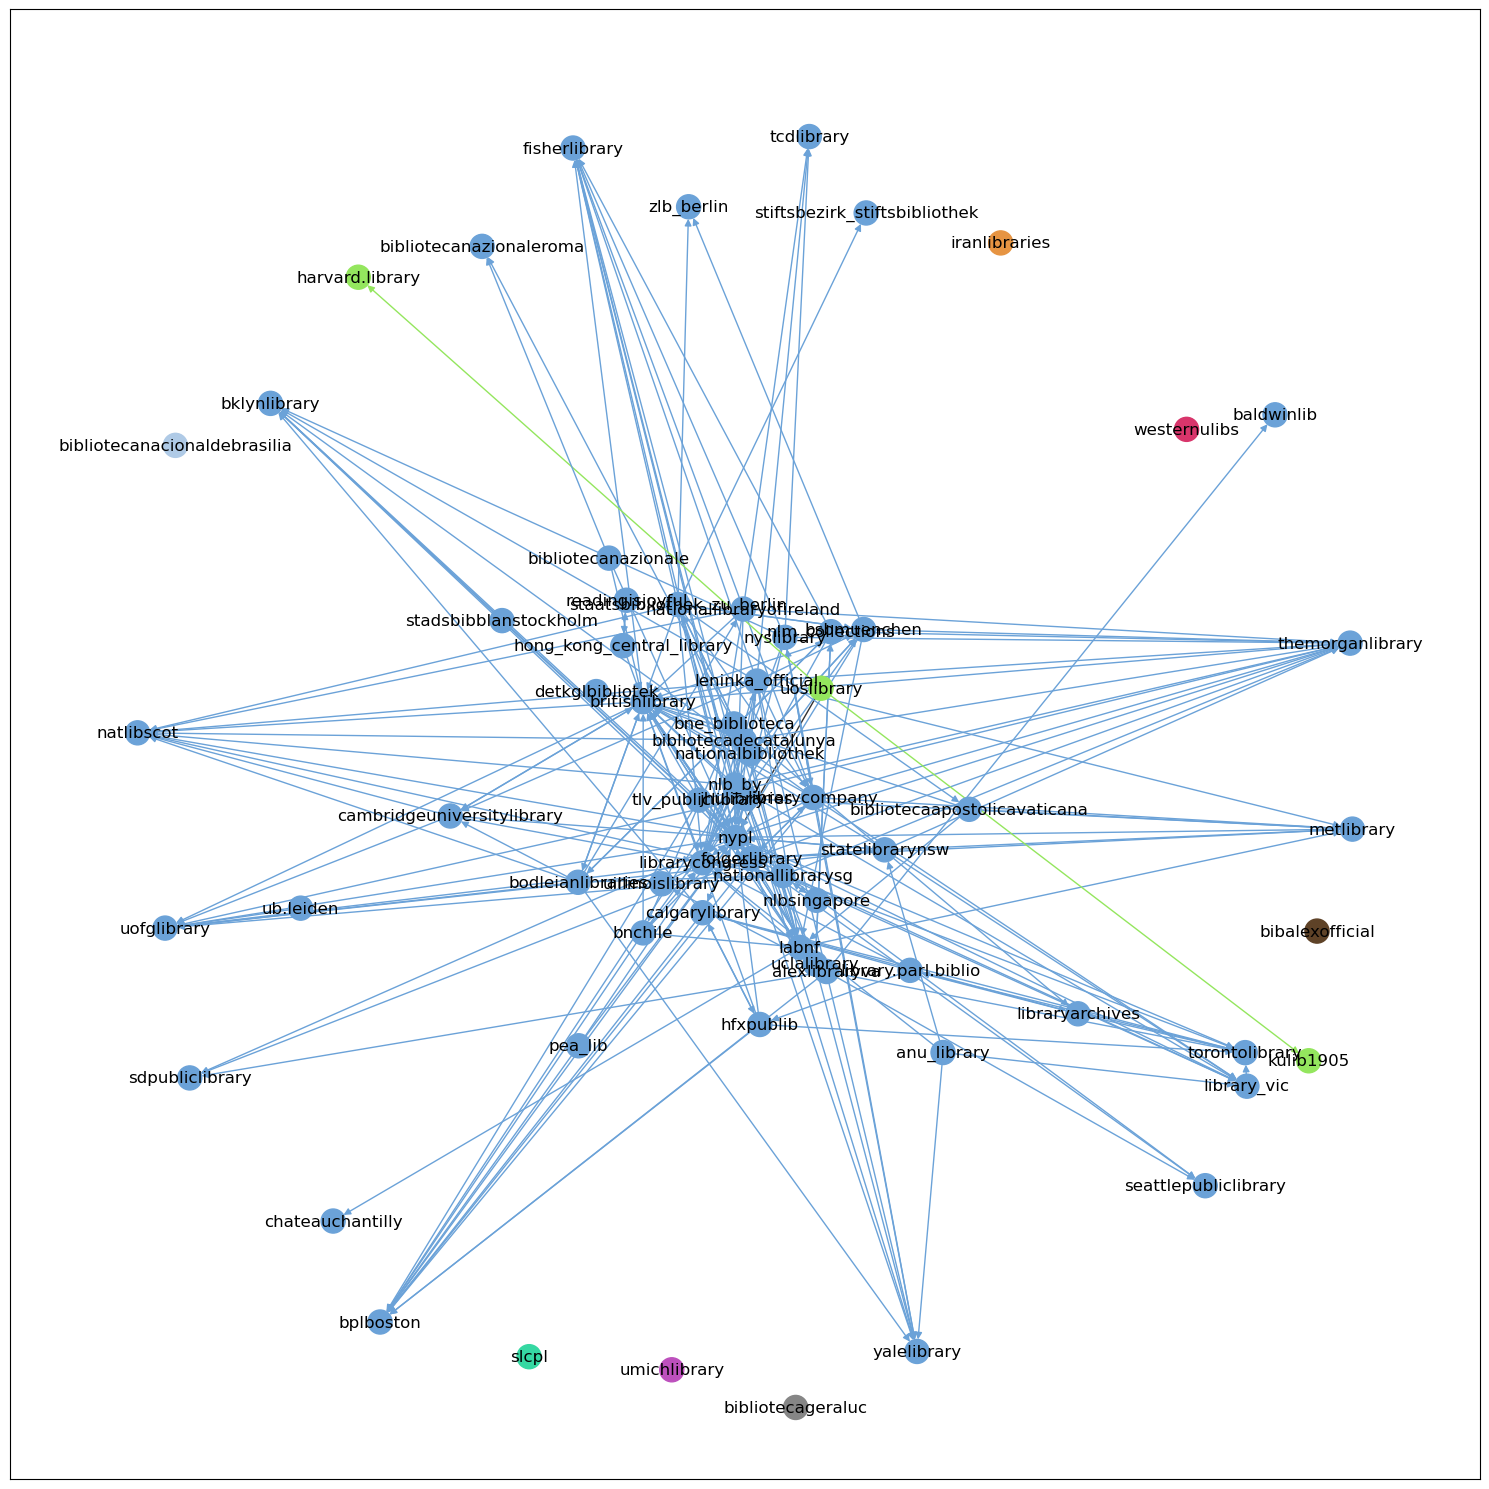

In [82]:
# node and edge communities
set_node_community(G, top_level_communities)
set_edge_community(G)

# community color for nodes
node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]
# community color for internal edges
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = [get_color(G.edges[e]['community']) for e in internal]
node_pos = nx.spring_layout(G)



nx.draw_networkx(
    G, pos=node_pos, node_size=0,
    edgelist=external, edge_color="#333333", with_labels=False)


nx.draw_networkx(
    G, pos=node_pos, node_color=node_color,
    edgelist=internal, edge_color=internal_color)

In [83]:
statdata=pd.read_csv("librarystats.csv")
df=pd.DataFrame(statdata)
df.columns
df.head()


Unnamed: 0                          Name    Instagram user  Followers  \
0           0              British Library     britishlibrary     379586   
1           1          Library of Congress    librarycongress     155115   
2           2      New York Public Library               nypl     506012   
3           3  Library and Archives Canada    libraryarchives      13237   
4           4        Russian State Library   leninka_official      14046   

   Following  Mediacount  Hashtagged  number of vistors per year(million)  \
0        189        1995       70947                                  1.6   
1         27        2013         914                                  1.9   
2        478        4361      172956                                 16.0   
3        395         270        1569                                  2.8   
4        384        1516        1081                                  0.8   

       Funding Provider  Access                 Type  
0  Government/State Run     NaN  Academic/Scientific  
1  Government/State Run     NaN  Academic/Scientific  
2  Government/State Run     NaN              General  
3  Government/State Run     NaN  Academic/Scientific  
4  Government/State Run     NaN  Academic/Scientific

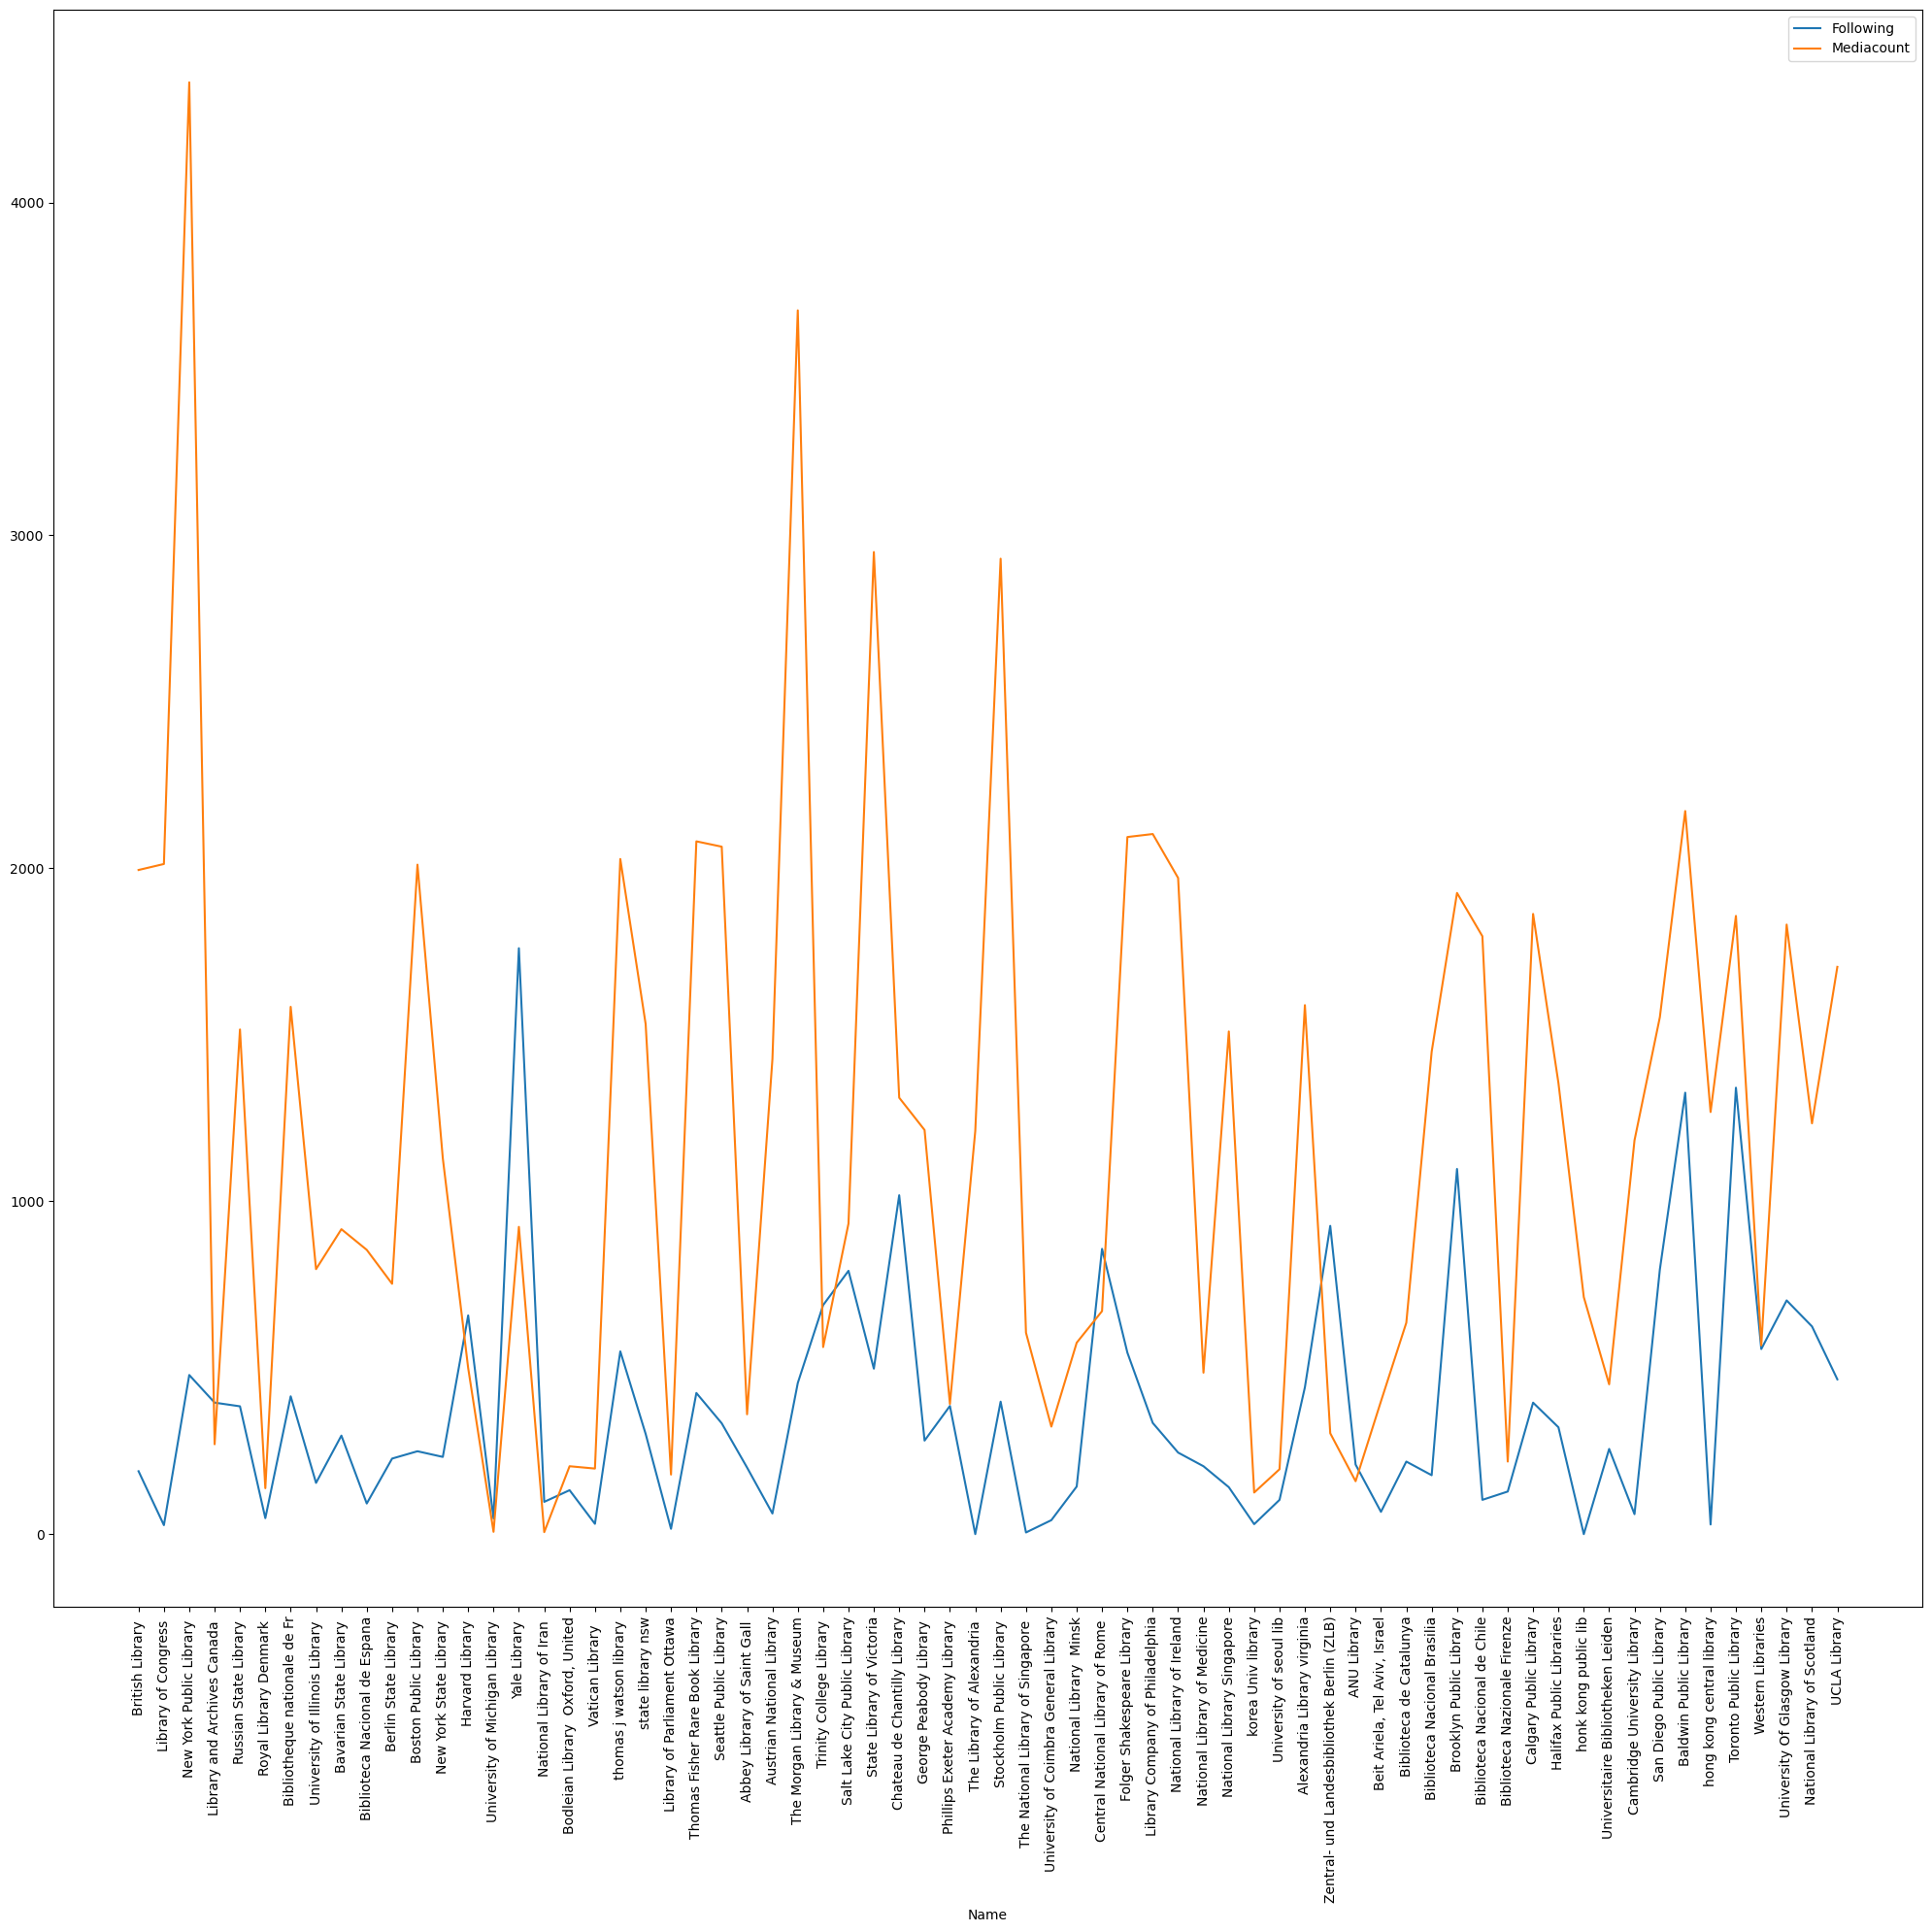

In [143]:
df.plot(x="Name", y=["Following", "Mediacount"],
        kind="line", figsize=(20, 20))

names = list(df['Name'])

# create a tick for each name on the x-axis
plt.xticks(range(len(names)), names)

# rotate the ticks to avoid overlapping
plt.xticks(rotation=90)

plt.show()

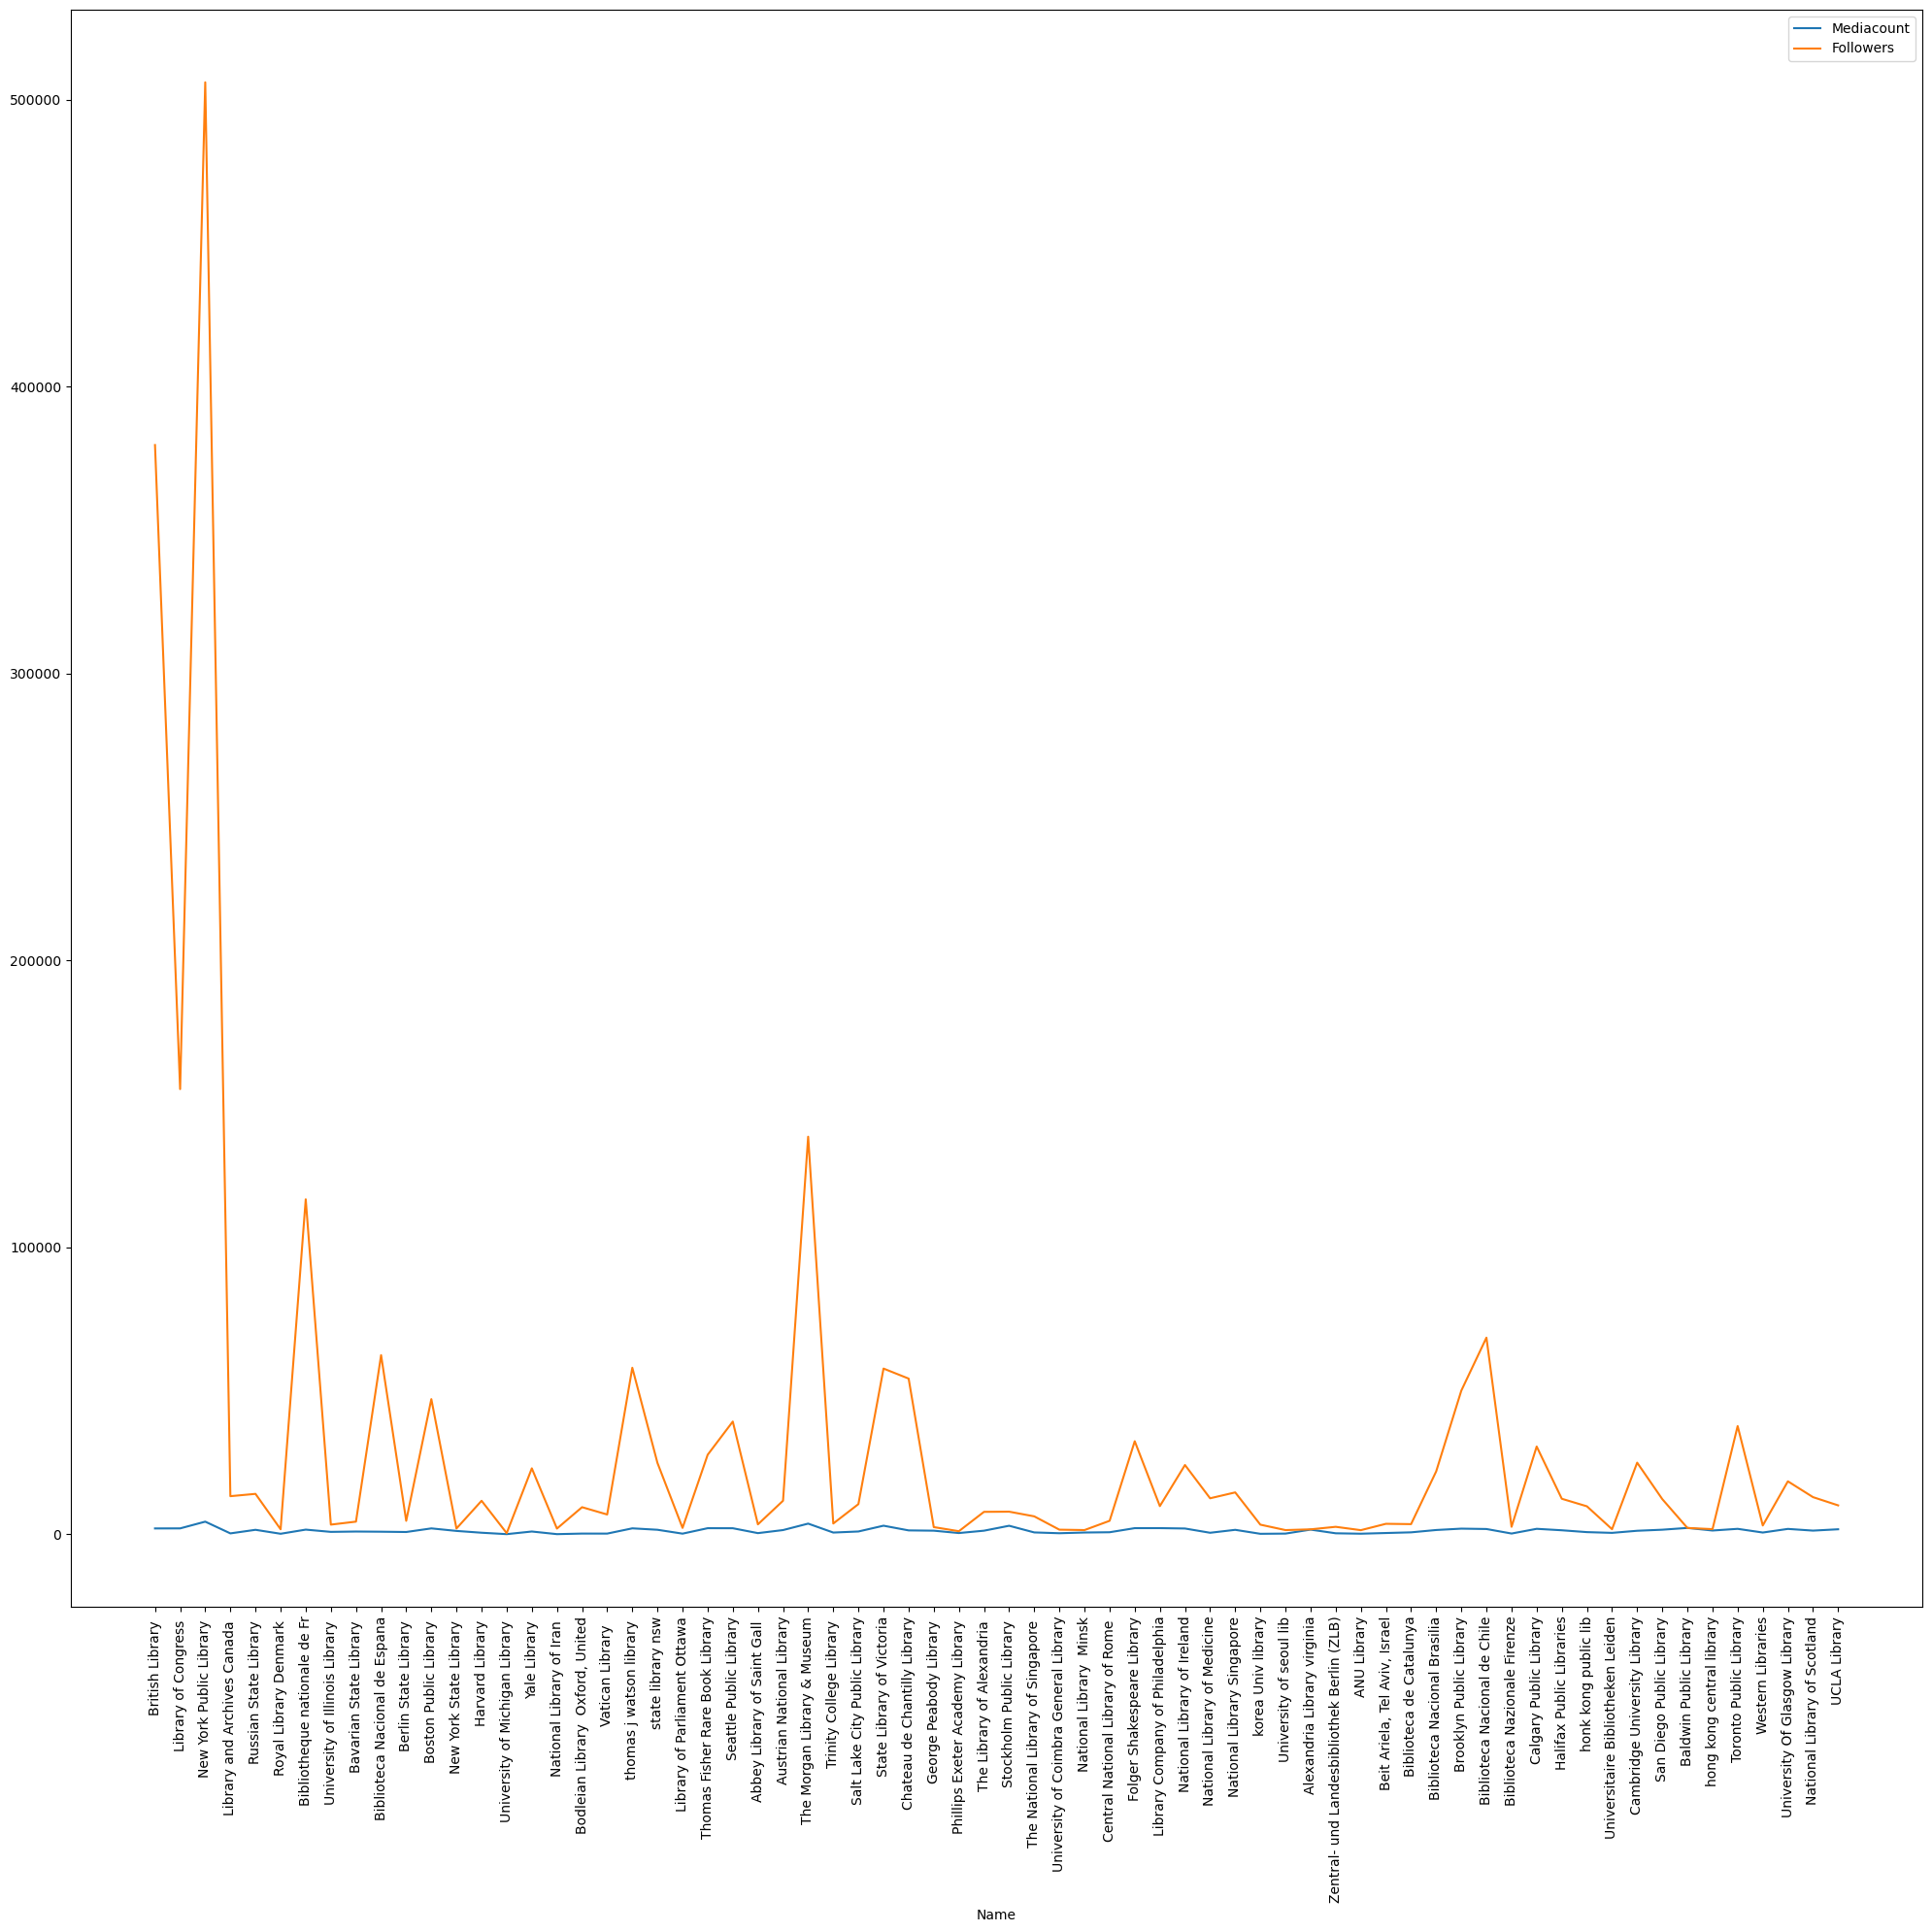

In [145]:
df.plot(x="Name", y=["Mediacount", "Followers"],
        kind="line", figsize=(20, 20))

names = list(df['Name'])

# create a tick for each name on the x-axis
plt.xticks(range(len(names)), names)

# rotate the ticks to avoid overlapping
plt.xticks(rotation=90)

plt.show()

In [147]:
df.shape

(68, 11)

In [148]:
df.insert(11,"visitors(div. by 100)",0)
df["visitors(div. by 100)"]=df["number of vistors per year(million)"]*10000
df.head()

Unnamed: 0                          Name    Instagram user  Followers  \
0           0              British Library     britishlibrary     379586   
1           1          Library of Congress    librarycongress     155115   
2           2      New York Public Library               nypl     506012   
3           3  Library and Archives Canada    libraryarchives      13237   
4           4        Russian State Library   leninka_official      14046   

   Following  Mediacount  Hashtagged  number of vistors per year(million)  \
0        189        1995       70947                                  1.6   
1         27        2013         914                                  1.9   
2        478        4361      172956                                 16.0   
3        395         270        1569                                  2.8   
4        384        1516        1081                                  0.8   

       Funding Provider  Access                 Type  visitors(div. by 100)  
0  Government/State Run     NaN  Academic/Scientific                16000.0  
1  Government/State Run     NaN  Academic/Scientific                19000.0  
2  Government/State Run     NaN              General               160000.0  
3  Government/State Run     NaN  Academic/Scientific                28000.0  
4  Government/State Run     NaN  Academic/Scientific                 8000.0

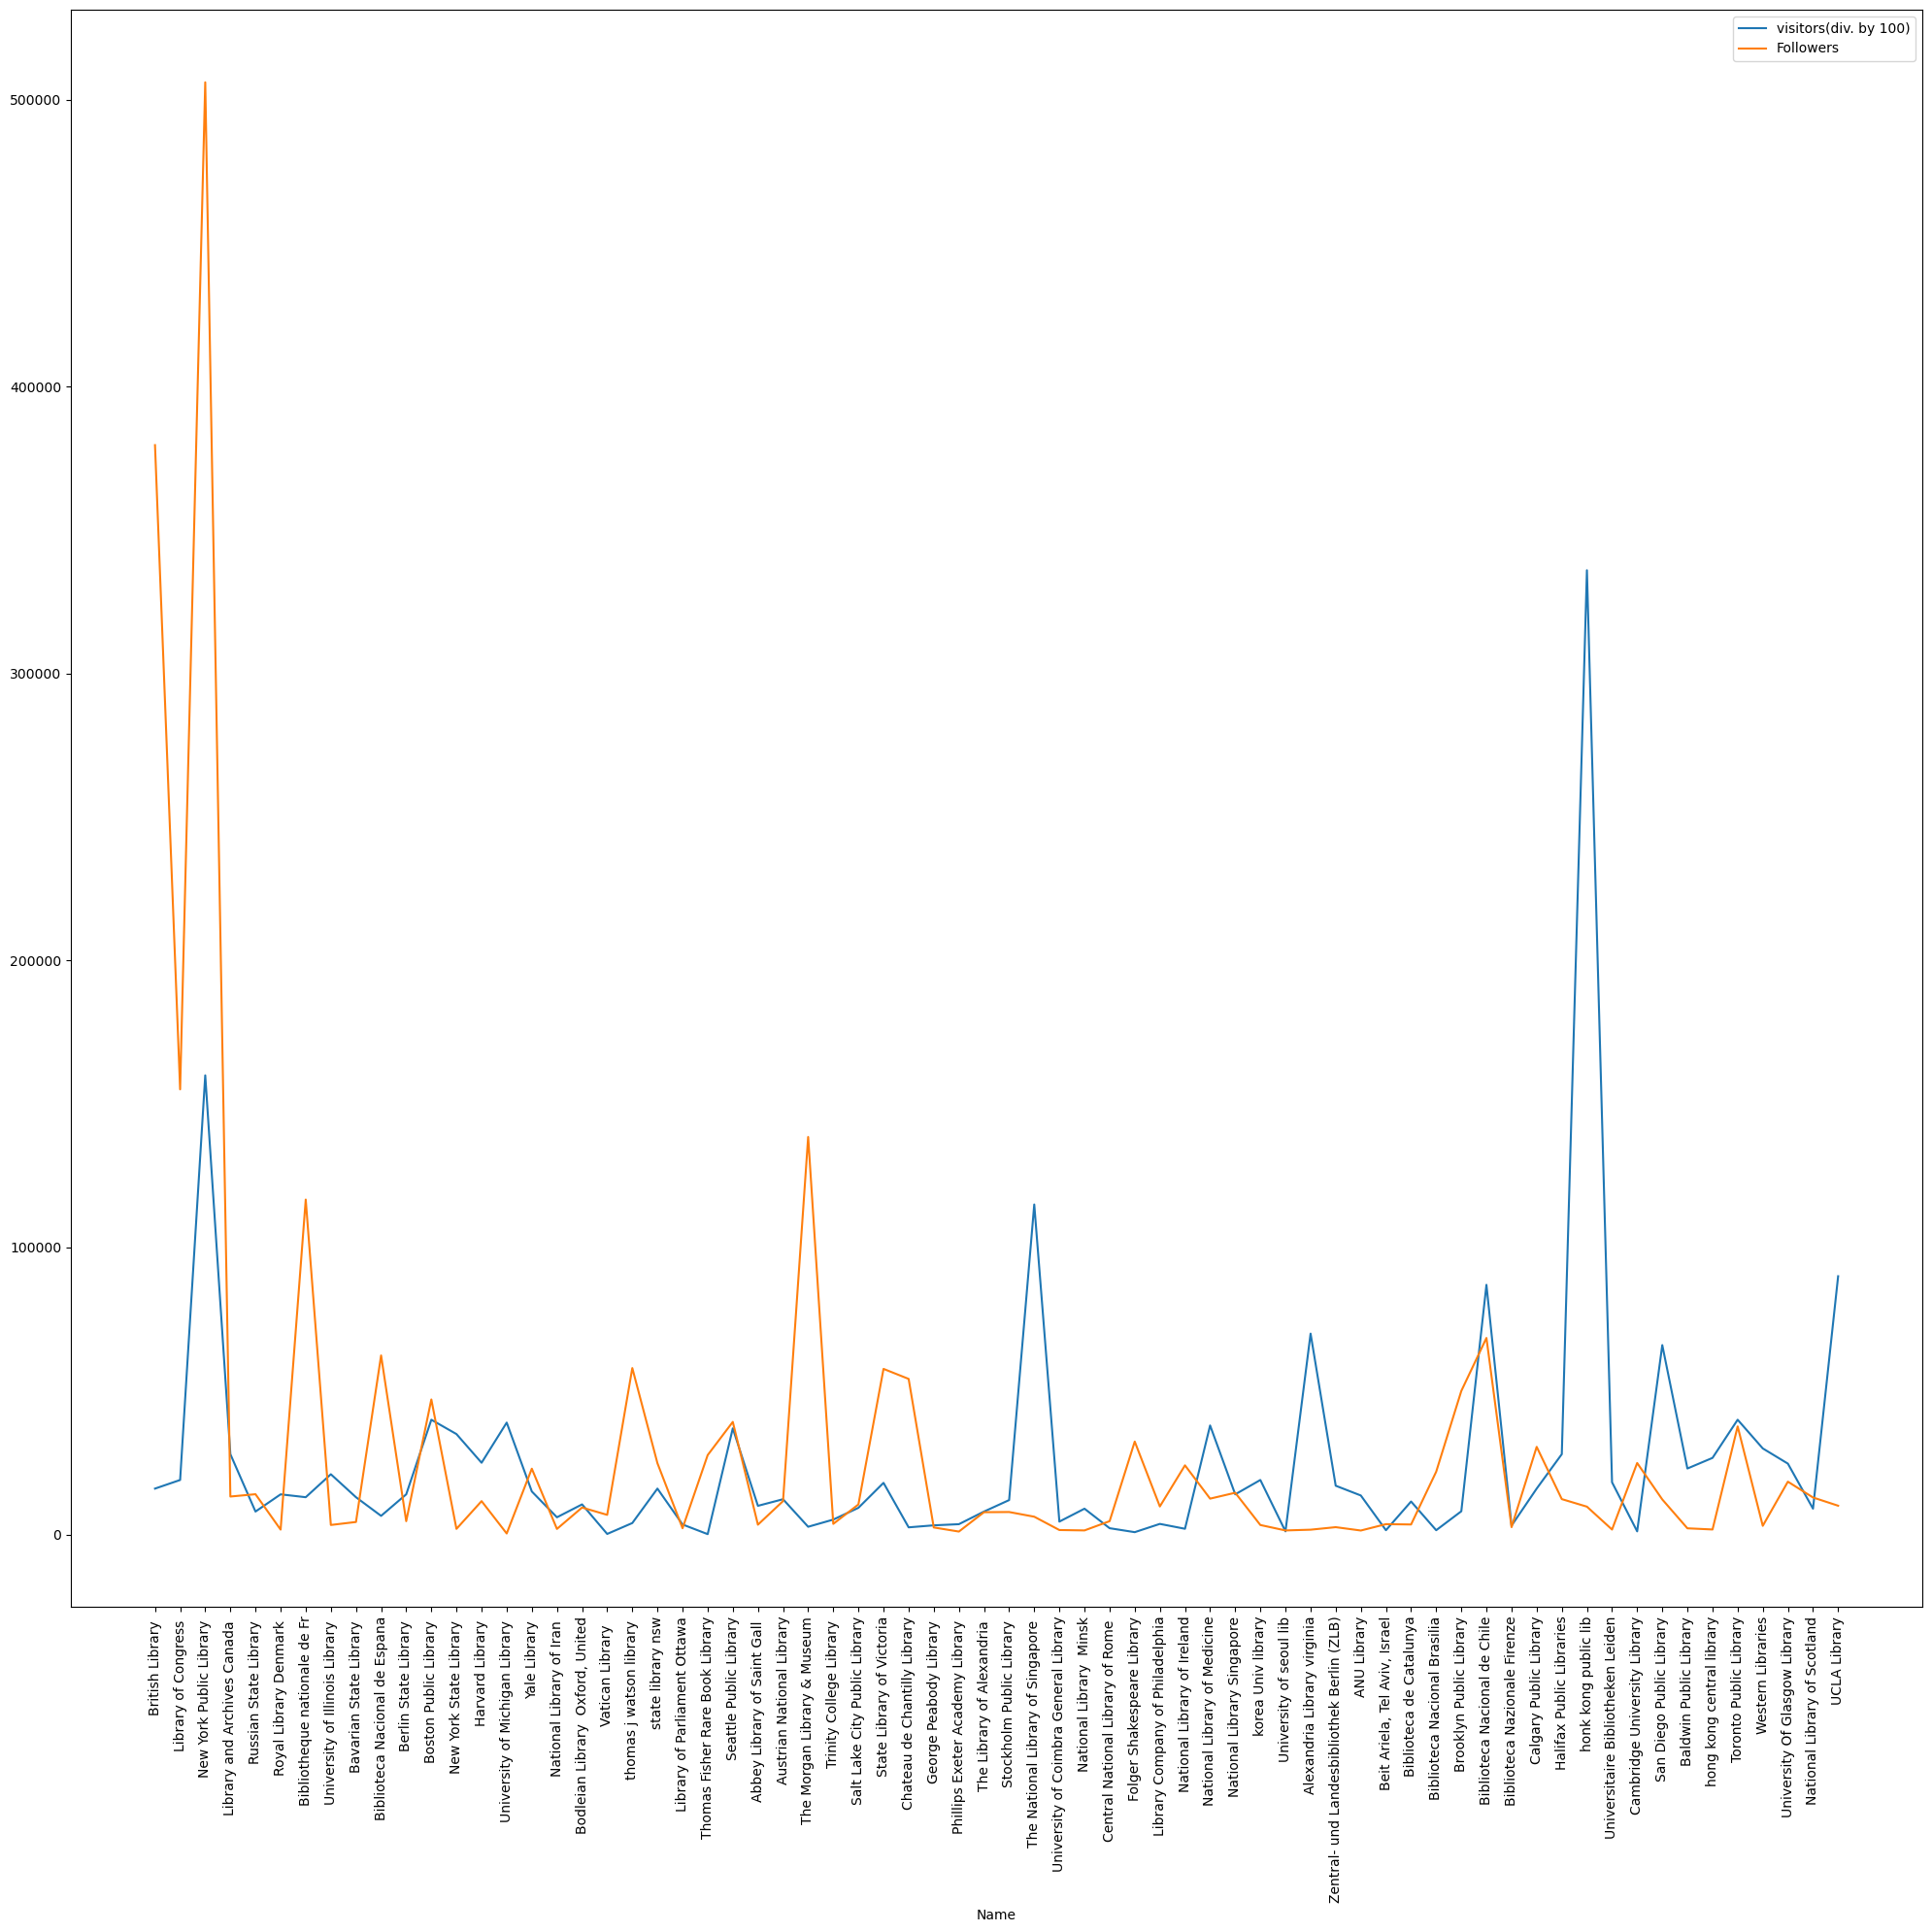

In [149]:
df.plot(x="Name", y=["visitors(div. by 100)", "Followers"],
        kind="line", figsize=(20, 20))


names = list(df['Name'])

# create a tick for each name on the x-axis
plt.xticks(range(len(names)), names)

# rotate the ticks to avoid overlapping
plt.xticks(rotation=90)

plt.show()

In [183]:
df.insert(12,"visitors(mult. by 100)",0)
df["visitors(div. by 100)"]=df["number of vistors per year(million)"]*1000
df.head()

Unnamed: 0                          Name    Instagram user  Followers  \
0           0              British Library     britishlibrary     379586   
1           1          Library of Congress    librarycongress     155115   
2           2      New York Public Library               nypl     506012   
3           3  Library and Archives Canada    libraryarchives      13237   
4           4        Russian State Library   leninka_official      14046   

   Following  Mediacount  Hashtagged  number of vistors per year(million)  \
0        189        1995       70947                                  1.6   
1         27        2013         914                                  1.9   
2        478        4361      172956                                 16.0   
3        395         270        1569                                  2.8   
4        384        1516        1081                                  0.8   

       Funding Provider  Access                 Type  visitors(div. by 100)  \
0  Government/State Run     NaN  Academic/Scientific                 1600.0   
1  Government/State Run     NaN  Academic/Scientific                 1900.0   
2  Government/State Run     NaN              General                16000.0   
3  Government/State Run     NaN  Academic/Scientific                 2800.0   
4  Government/State Run     NaN  Academic/Scientific                  800.0   

   visitors(mult. by 100)  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0

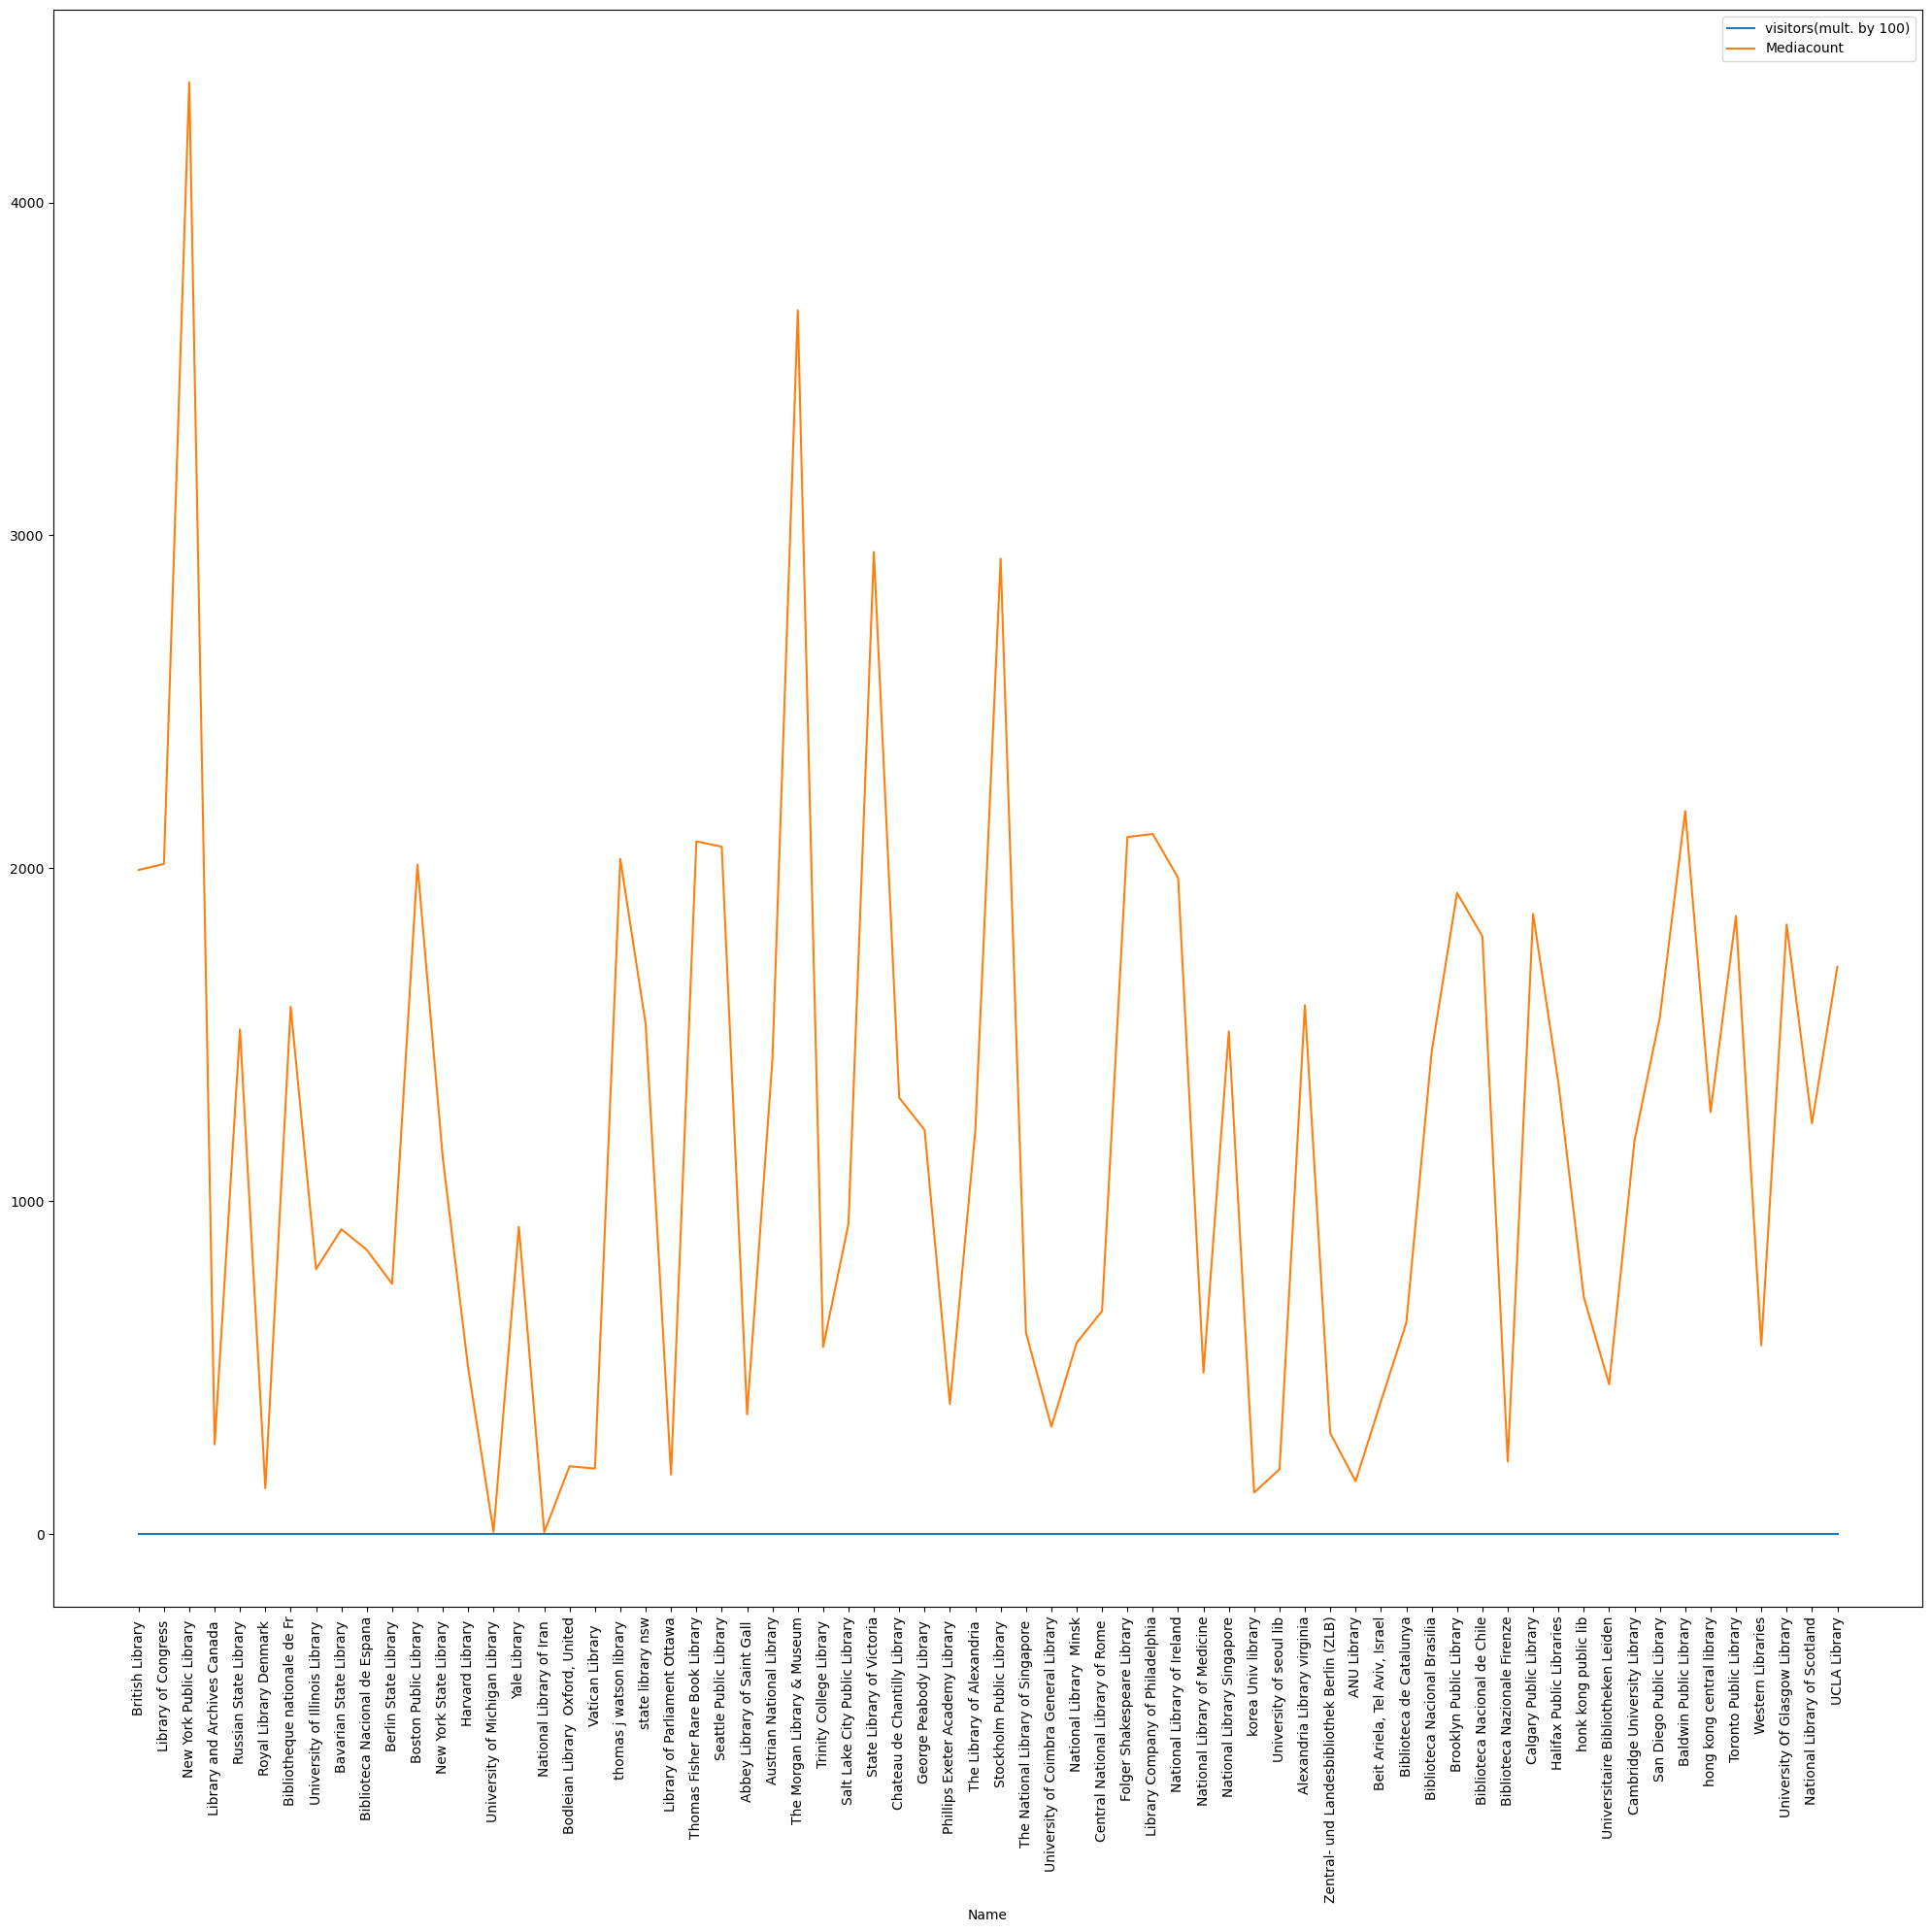

In [ ]:
#if it is government funded or private,- ok
#academic or non academic - ok
#community analysis
#revenue if possible - not possible 
#budget - not possible
#remove barrow library, public libraries singapore

In [ ]:
G_undirected=G.to_undirected()
#G_undirected=G.to_undirected(reciprocal=True)

nx.draw_circular(G_undirected,with_labels=True,node_size=150,font_size=7)


In [ ]:
followers_dict = dict(zip(df['Instagram user'], df['Followers']))
#followers_dict

nx.set_node_attributes(G_undirected, followers_dict, 'followers')

partition = community.best_partition(G_undirected, weight='followers')

# Draw the graph with nodes colored according to their community
pos = nx.circular_layout(G_undirected)
nx.draw_networkx_nodes(G_undirected, pos, node_color=list(partition.values()), node_size=150, cmap='viridis')
nx.draw_networkx_edges(G_undirected, pos, edge_color="skyblue")
nx.draw_networkx_labels(G_undirected, pos, font_size=7)

In [ ]:
#Scatter plot of visitors vs followers
plt.scatter(x=df["Followers"],y=df["visitors(div. by 100)"])

In [ ]:
plt.plot(df["Hashtagged"])

In [ ]:
c1=comx.greedy_modularity_communities(G, weight=None, resolution=1, cutoff=1, best_n=None)

#len(c1)


In [ ]:
#Scatter plot of visitors vs media shared
#Scatter plot of followers vs media shared
#Then independent scatter plot of number of followers, visitors colored by type of library and funding
#Network centrality measures - analyse most influential and most non influential nodes
#Form communities within general libraries, within academic ones, see how many libraries from one region follow another, one type follow another

In [ ]:
#plt.scatter(x=df["Name"],y=df["Hashtagged"],c=df["Type"])
plt.scatter(x=df["Name"],y=df["Hashtagged"])

C:\Users\Aditi\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


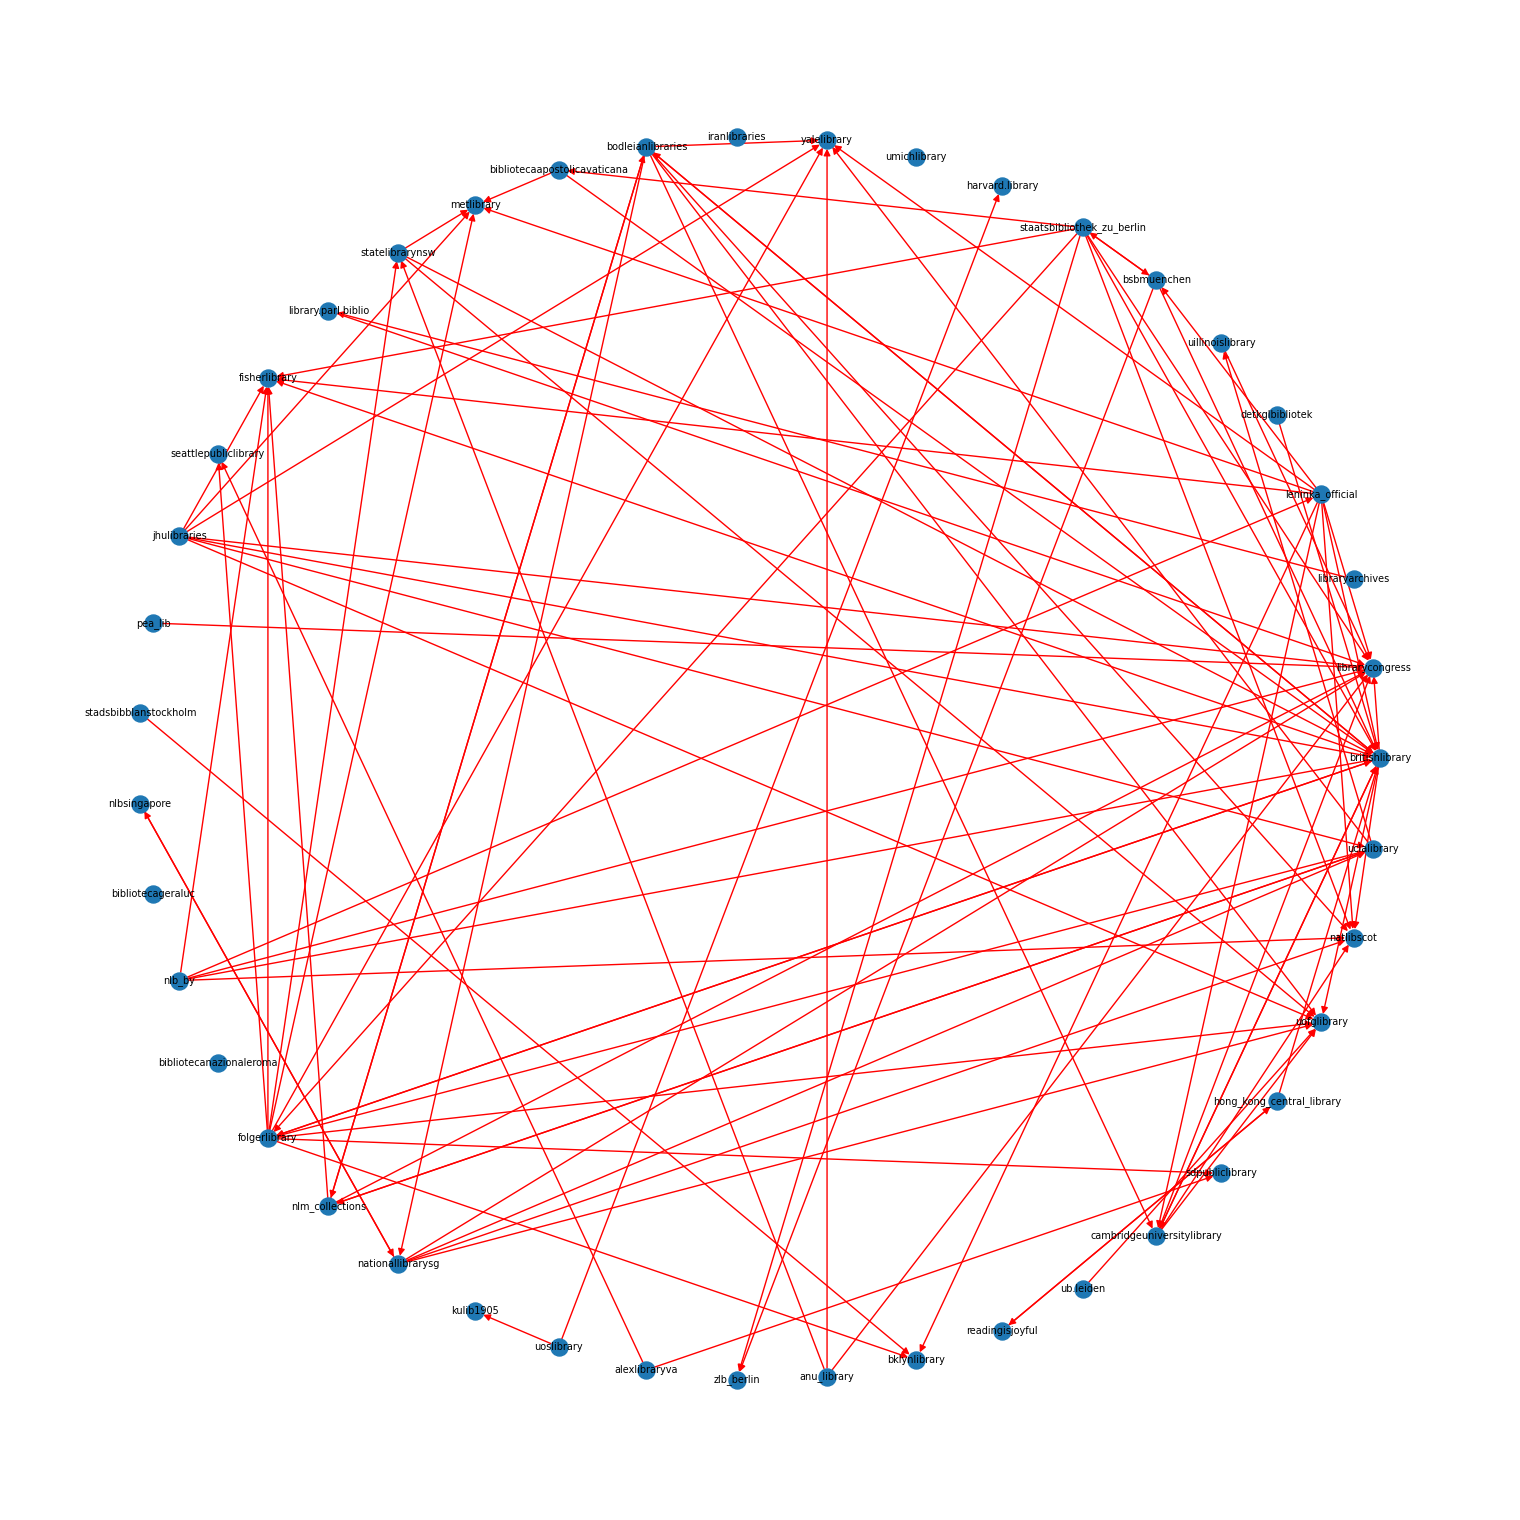

In [155]:
#the relationship between academic libraries:
dfsc=df.loc[df['Type'] == "Academic/Scientific"]
dfsc.head()

G2=G.subgraph(dfsc["Instagram user"])

nx.draw_circular(G2,with_labels=True,node_size=150,font_size=7,edge_color="red")


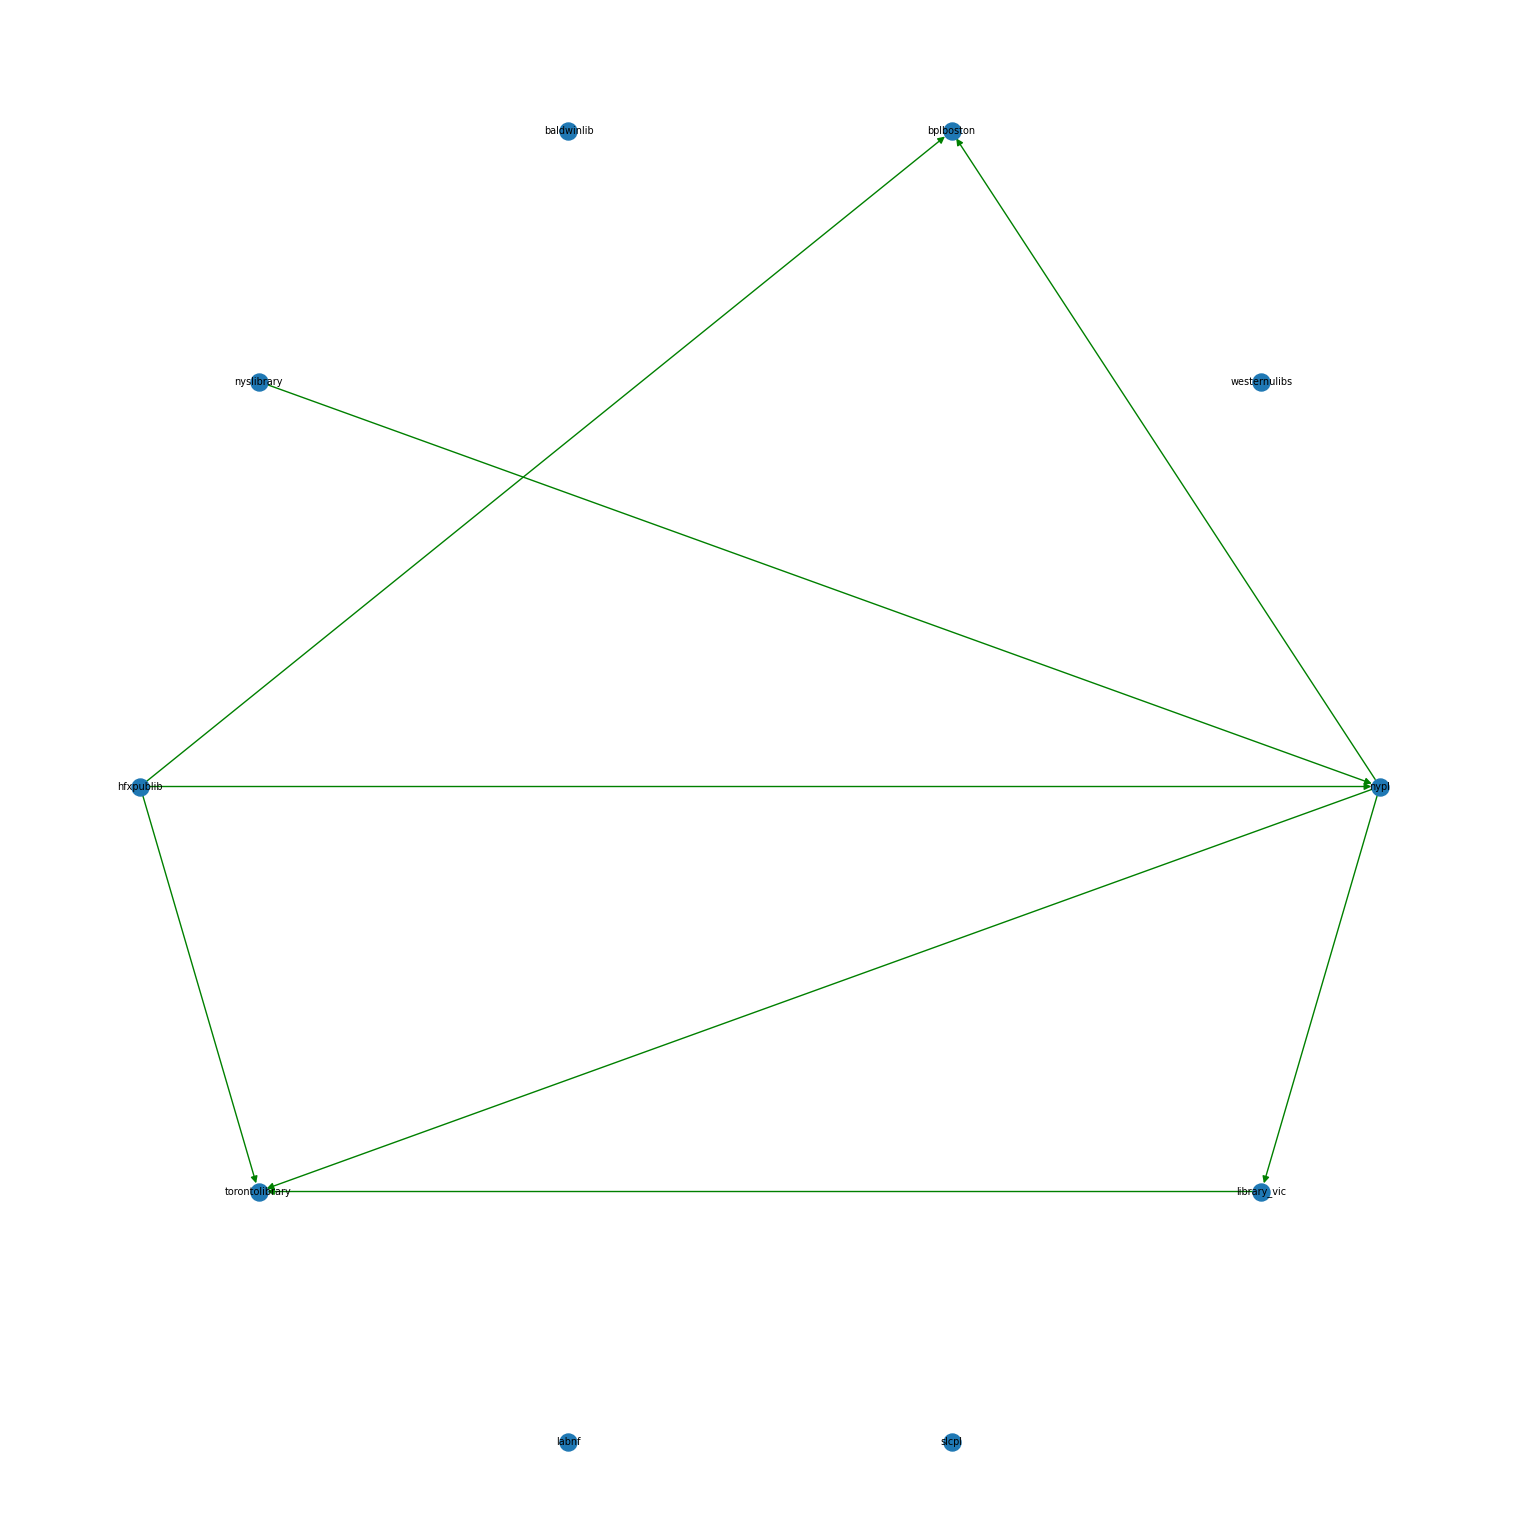

In [85]:
#the relationship between general libraries:
dfgen=df.loc[df['Type'] == "General"]
dfgen.head()

G3=G.subgraph(dfgen["Instagram user"])

nx.draw_circular(G3,with_labels=True,node_size=150,font_size=7,edge_color="green")

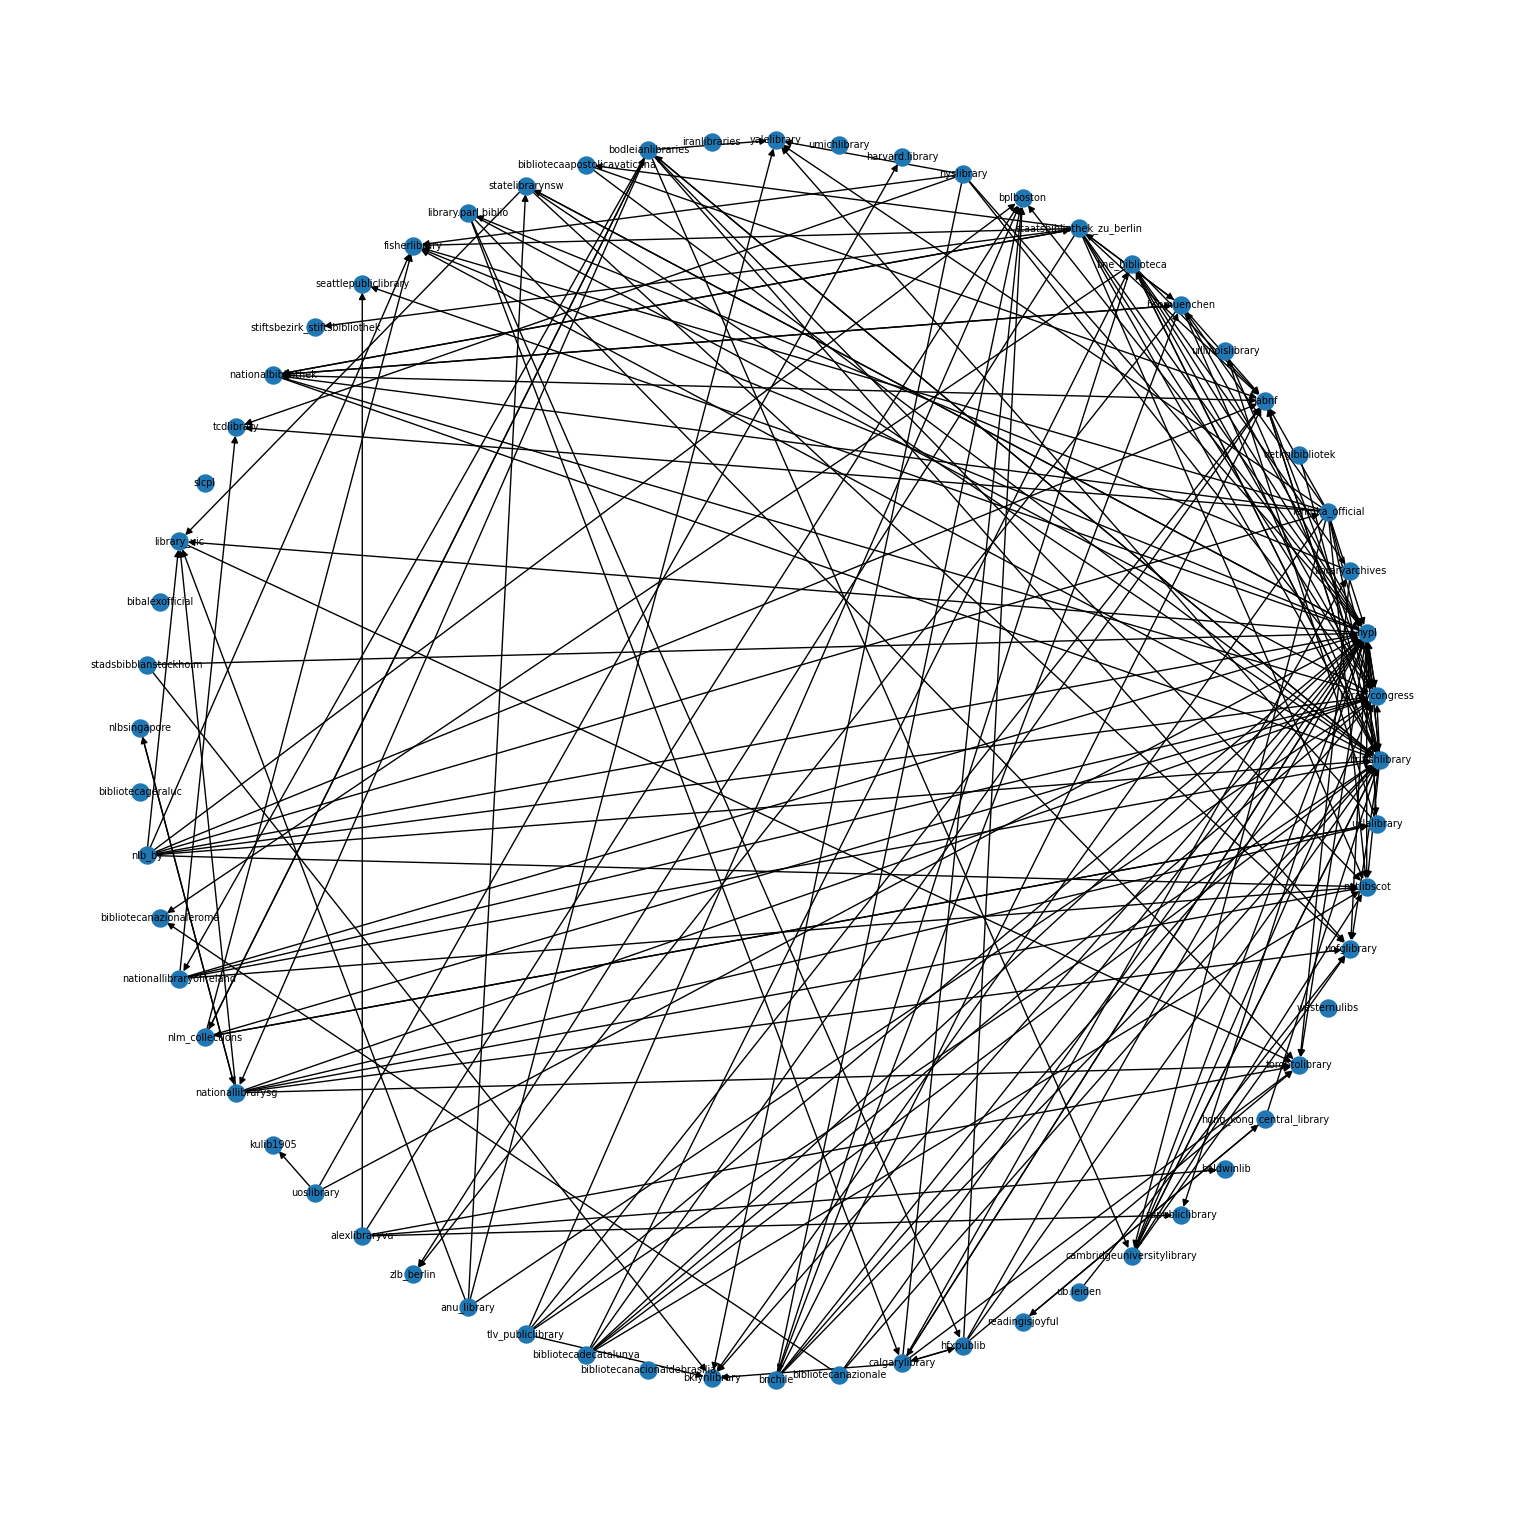

In [86]:
#relationship between government funded libraries
dfgov=df.loc[df['Funding Provider'] == "Government/State Run"]
dfgov.head()

G4=G.subgraph(dfgov["Instagram user"])

nx.draw_circular(G4,with_labels=True,node_size=150,font_size=7,edge_color="black")
    

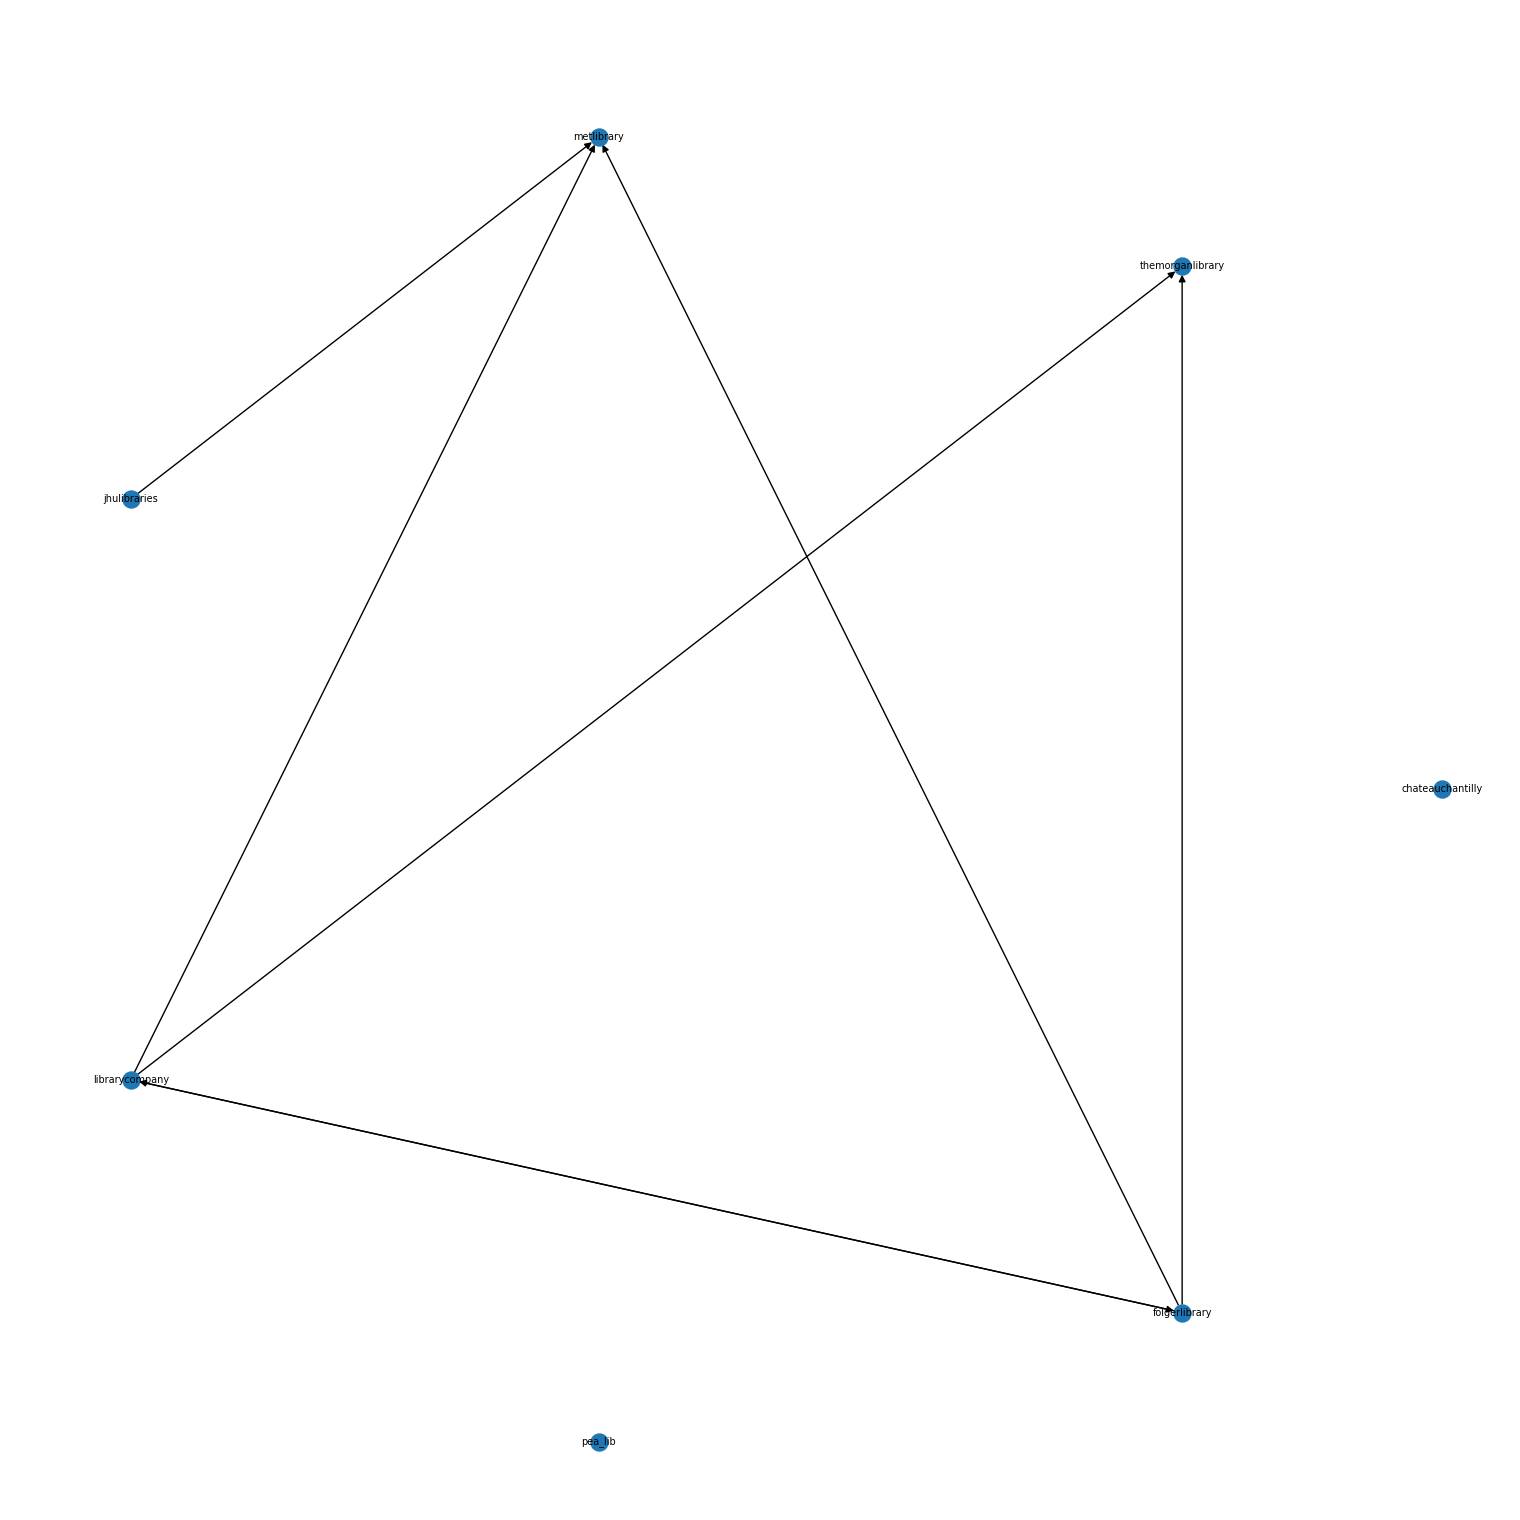

In [87]:
#relationship between private funded libraries
#relationship between government funded libraries
dfpriv=df.loc[df['Funding Provider'] == "Private/Donations"]
dfpriv.head()

G5=G.subgraph(dfpriv["Instagram user"])

nx.draw_circular(G5,with_labels=True,node_size=150,font_size=7,edge_color="black")
    

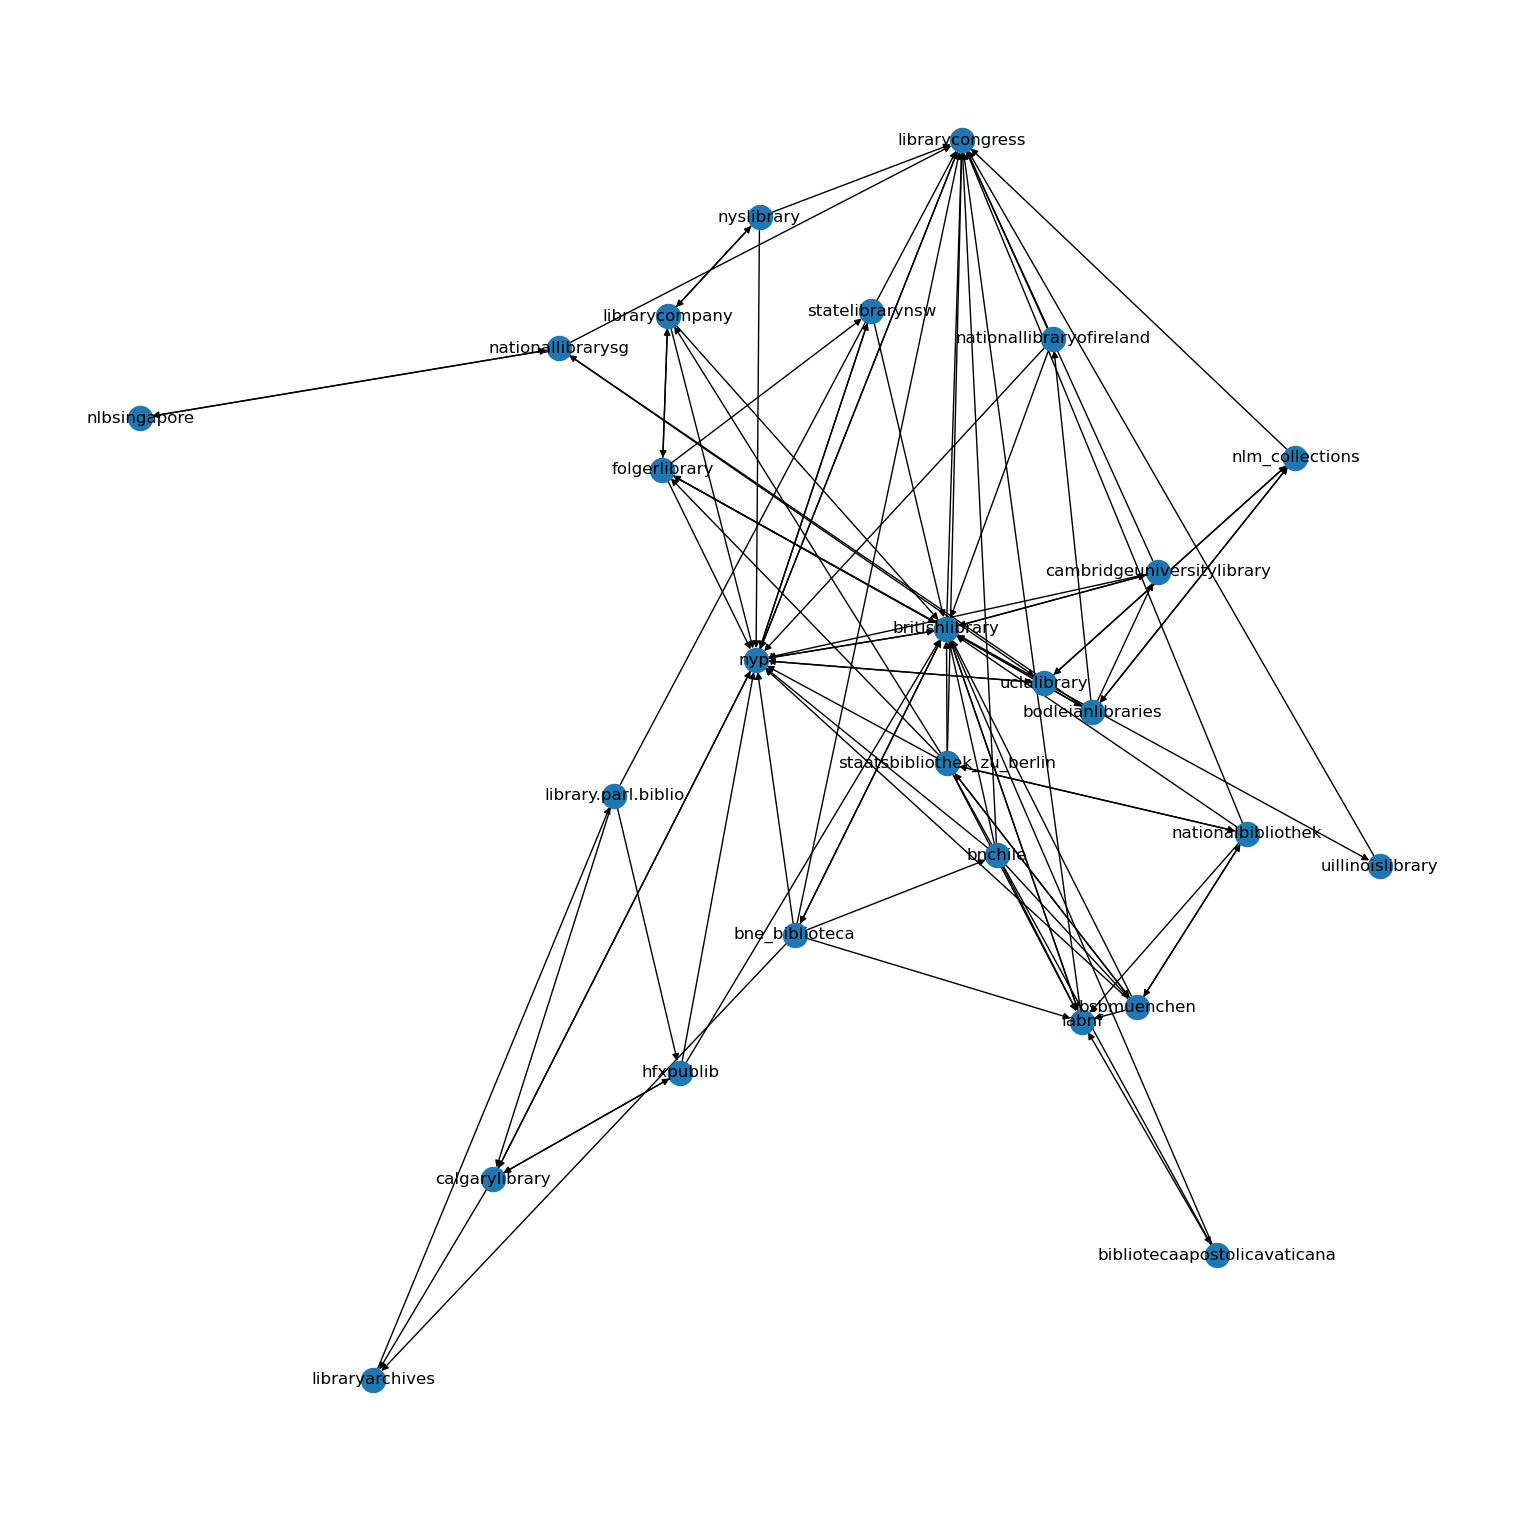

In [88]:
#checking if a small world network can be considered:

# get strongly connected components
scc = list(nx.strongly_connected_components(G))

# create subgraph of largest strongly connected component
largest_scc = max(scc, key=len)
H = G.subgraph(largest_scc)
nx.draw(H,with_labels=True)


In [89]:
H_undirected=H.to_undirected()

aspl = nx.average_shortest_path_length(H_undirected)
# Step 2: Calculate the clustering coefficient
cc = nx.average_clustering(H_undirected)

aspl,cc

(2.0123076923076924, 0.4696862966093735)

In [90]:
# Step 3: Generate an equivalent random graph
num_nodes = H.number_of_nodes()
num_edges = H.number_of_edges()
random_H = nx.fast_gnp_random_graph(num_nodes, num_edges/(num_nodes*(num_nodes-1)/2))


# Step 4: Calculate the average shortest path length and clustering coefficient of the random graph
random_aspl = nx.average_shortest_path_length(random_H)
random_cc = nx.average_clustering(random_H)

random_aspl,random_cc

(1.8, 0.3196053946053946)

In [91]:
import math
if cc/random_cc > 1 and aspl/random_aspl < math.log(num_nodes)/math.log(2):
    print("The graph is a small-world network")
else:
    print("The graph is not a small-world network")

The graph is a small-world network


In [171]:
c = nx.community.greedy_modularity_communities(G)

c

[frozenset({'bibliotecaapostolicavaticana',
            'bibliotecadecatalunya',
            'bibliotecanazionale',
            'bibliotecanazionaleroma',
            'bnchile',
            'bne_biblioteca',
            'britishlibrary',
            'bsbmuenchen',
            'chateauchantilly',
            'detkglbibliotek',
            'labnf',
            'librarycongress',
            'nationalbibliothek',
            'staatsbibliothek_zu_berlin',
            'stiftsbezirk_stiftsbibliothek',
            'zlb_berlin'}),
 frozenset({'anu_library',
            'bklynlibrary',
            'fisherlibrary',
            'folgerlibrary',
            'jhulibraries',
            'leninka_official',
            'library_vic',
            'librarycompany',
            'metlibrary',
            'nlb_by',
            'nyslibrary',
            'statelibrarynsw',
            'tcdlibrary',
            'themorganlibrary',
            'yalelibrary'}),
 frozenset({'alexlibraryva',
            'baldwin

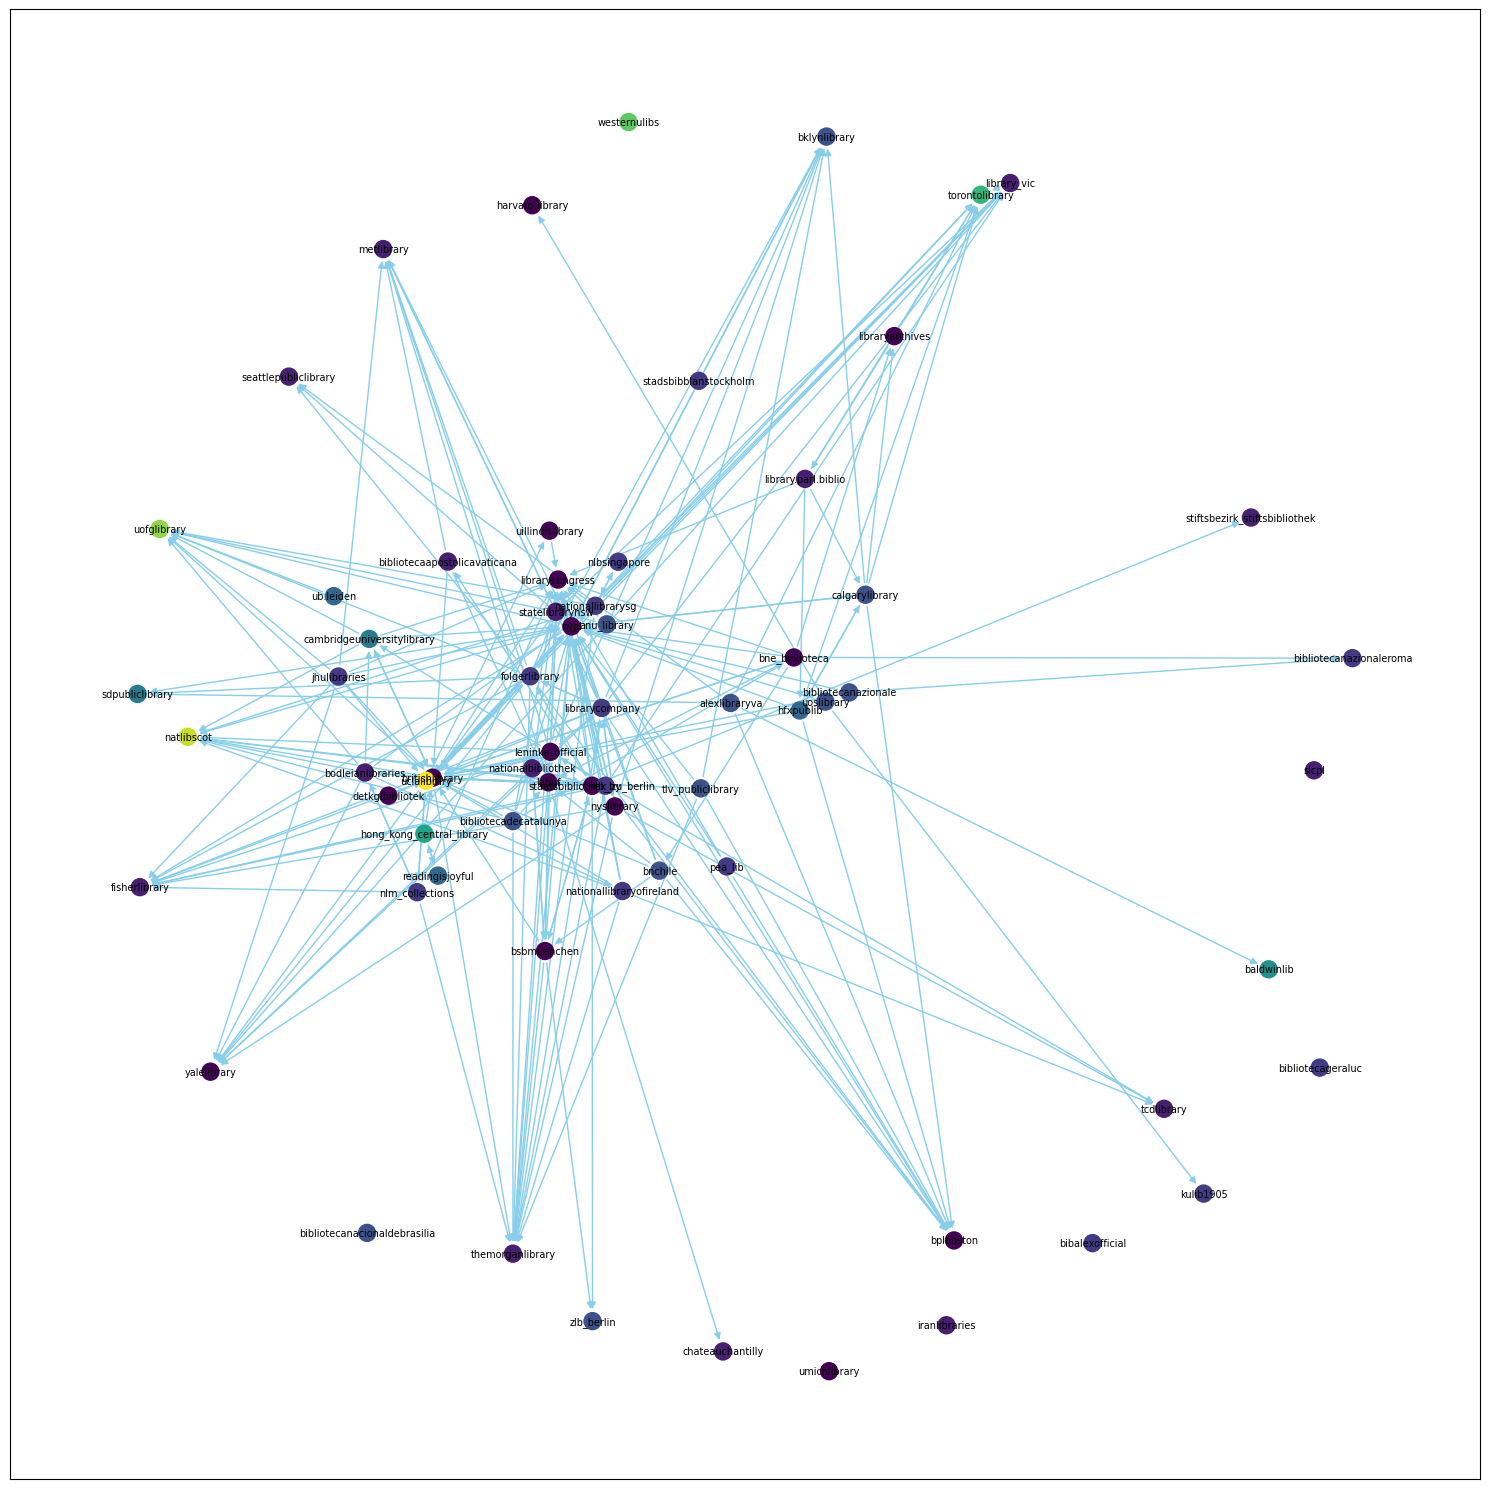

In [126]:
# Assign a color to each community
color_map = {}
for i, community in enumerate(c):
    for node in community:
        color_map[node] = i

# Draw the graph with nodes colored according to their community
pos = nx.spring_layout(G)  # Replace with your own node positions
nx.draw_networkx_nodes(G, pos, node_color=list(color_map.values()), node_size=150, cmap='viridis')
nx.draw_networkx_edges(G, pos, edge_color="skyblue")
nx.draw_networkx_labels(G, pos, font_size=7)

plt.show()

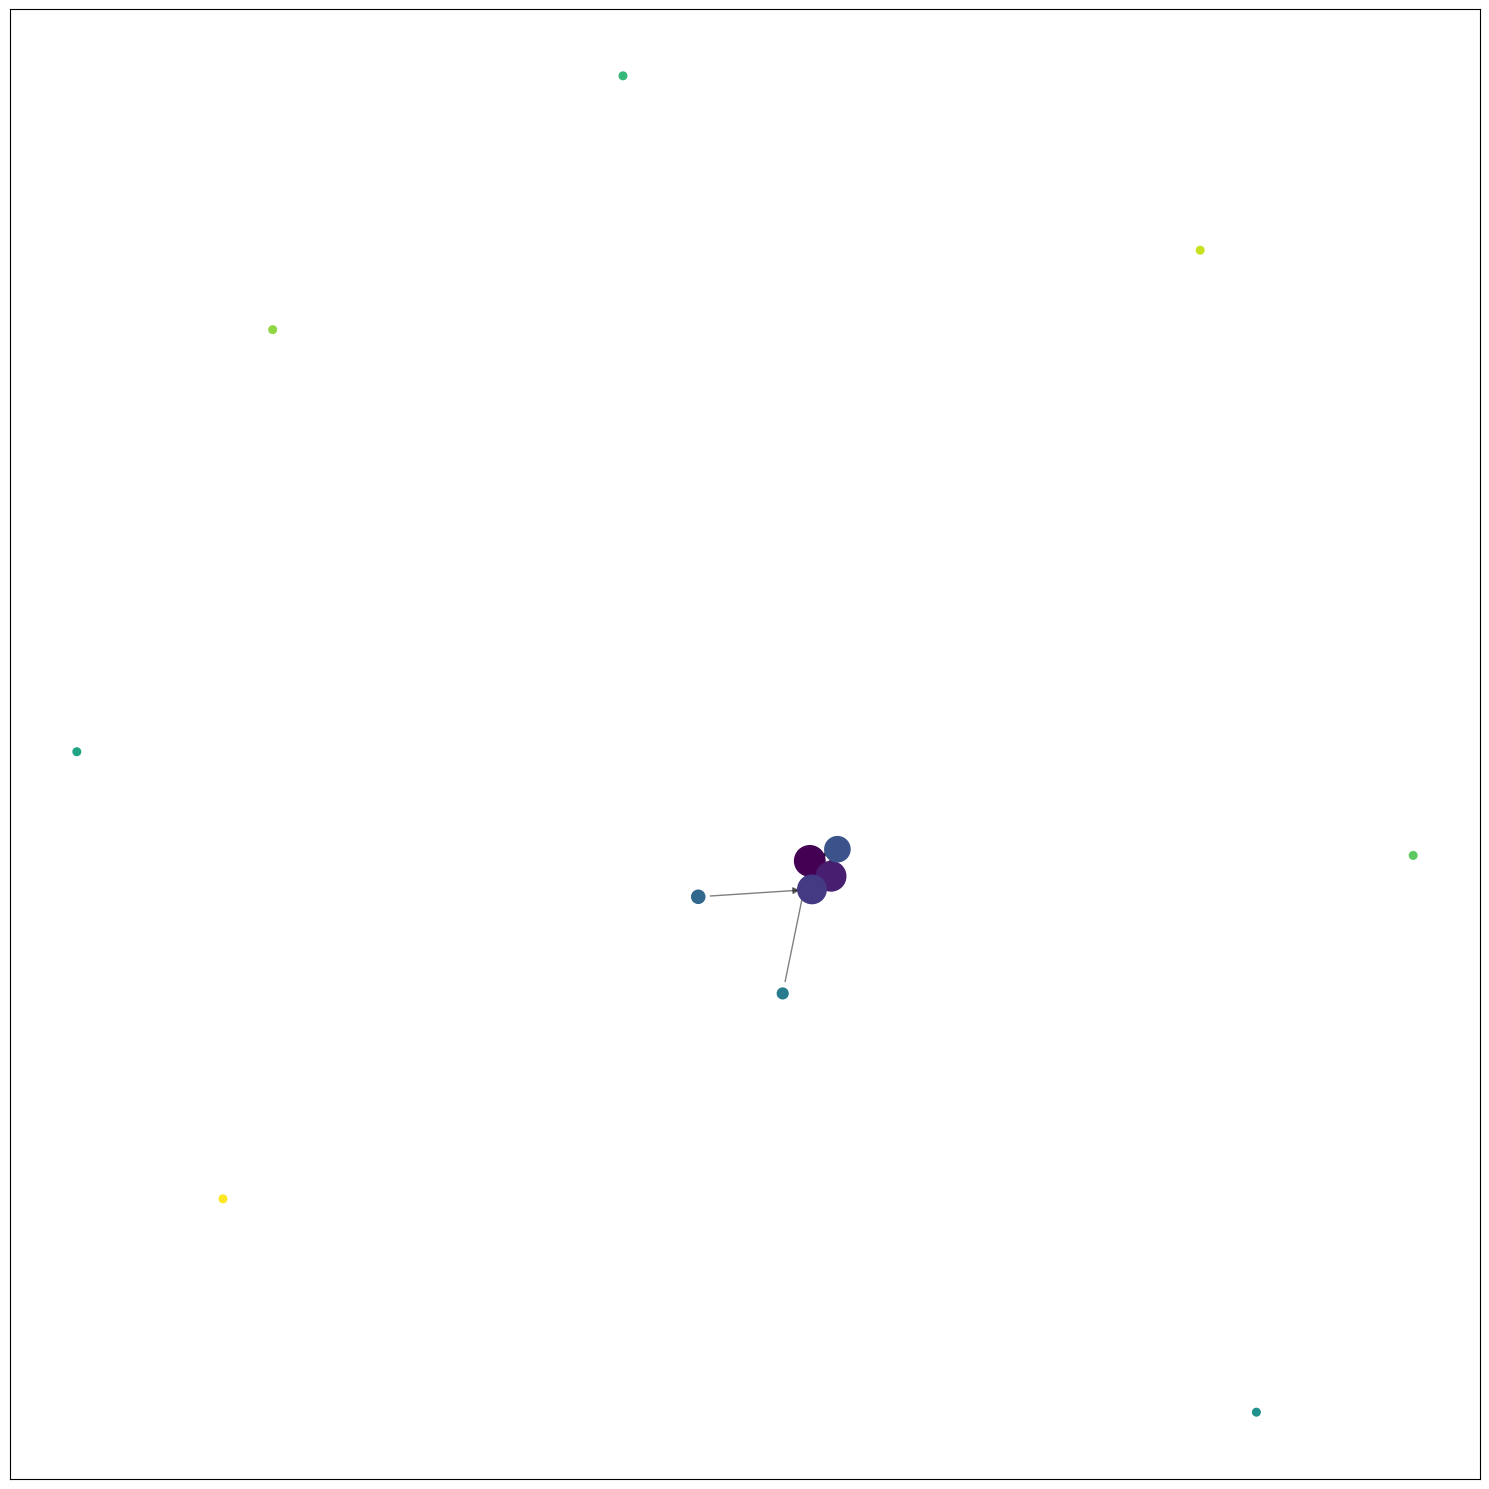

In [174]:
quotient_graph = nx.quotient_graph(G, c)

node_color = []
node_size = []
for i, community in enumerate(c):
    size = len(community)
    node_size.append(size*30)
    node_color.append(i)

labels=["1","2","3","4","5","6","7","8","9","10","11","12","13"]    
    
# Draw the quotient graph
pos = nx.spring_layout(quotient_graph)
nx.draw_networkx_nodes(quotient_graph, pos, node_size=node_size,node_color=node_color)
nx.draw_networkx_edges(quotient_graph, pos, alpha=0.5)

plt.show()

In [179]:
# create a dictionary to map nodes to their respective communities
node2community = {}
for i, community in enumerate(c):
    for node in community:
        node2community[node] = i

# create a subgraph for each community
community_subgraphs = []
for i, community in enumerate(c):
    nodes_in_community = [node for node in community]
    subgraph = G.subgraph(nodes_in_community)
    community_subgraphs.append(subgraph)

# analyze each community subgraph
for i, subgraph in enumerate(community_subgraphs):
    # get the size of the community
    community_size = len(subgraph.nodes)
    
    # calculate the degree centrality of each node
    degree_centrality = nx.degree_centrality(subgraph)
    
    # calculate the betweenness centrality of each node
    betweenness_centrality = nx.betweenness_centrality(subgraph)
    
    # calculate the clustering coefficient of the community
    clustering_coefficient = nx.average_clustering(subgraph)
    
    print(f"Community {i}:")
    print(f"Size: {community_size}")
    print(f"Degree centrality (max/avg): {max(degree_centrality.values()):.3f}/{sum(degree_centrality.values())/len(degree_centrality):.3f}")
    print(f"Betweenness centrality (max/avg): {max(betweenness_centrality.values()):.3f}/{sum(betweenness_centrality.values())/len(betweenness_centrality):.3f}")
    print(f"Clustering coefficient: {clustering_coefficient:.3f}")

Community 0:
Size: 16
Degree centrality (max/avg): 0.867/0.350
Betweenness centrality (max/avg): 0.252/0.064
Clustering coefficient: 0.341
Community 1:
Size: 15
Degree centrality (max/avg): 0.786/0.400
Betweenness centrality (max/avg): 0.071/0.011
Clustering coefficient: 0.182
Community 2:
Size: 14
Degree centrality (max/avg): 0.769/0.319
Betweenness centrality (max/avg): 0.192/0.030
Clustering coefficient: 0.247
Community 3:
Size: 11
Degree centrality (max/avg): 0.700/0.345
Betweenness centrality (max/avg): 0.178/0.055
Clustering coefficient: 0.131
Community 4:
Size: 3
Degree centrality (max/avg): 1.000/0.667
Betweenness centrality (max/avg): 0.000/0.000
Clustering coefficient: 0.000
Community 5:
Size: 2
Degree centrality (max/avg): 2.000/2.000
Betweenness centrality (max/avg): 0.000/0.000
Clustering coefficient: 0.000
Community 6:
Size: 1
Degree centrality (max/avg): 1.000/1.000
Betweenness centrality (max/avg): 0.000/0.000
Clustering coefficient: 0.000
Community 7:
Size: 1
Degree ce

In [97]:
dfpriv.head()


Unnamed: 0                              Name    Instagram user  Followers  \
19          19          thomas j watson library         metlibrary      58005   
26          26       The Morgan Library & Museum  themorganlibrary     138534   
30          30      Chateau de Chantilly Library  chateauchantilly      54221   
31          31           George Peabody Library       jhulibraries       2460   
32          32  Phillips Exeter Academy Library            pea_lib       1029   

    Following  Mediacount  Hashtagged  number of vistors per year(million)  \
19        549        2028        3362                                 0.40   
26        454        3676        6750                                 0.27   
30       1018        1311        8817                                 0.25   
31        281        1214         174                                 0.32   
32        385         391         129                                 0.36   

     Funding Provider  Access                 Type  
19  Private/Donations     NaN  Academic/Scientific  
26  Private/Donations     NaN           Historical  
30  Private/Donations     NaN           Historical  
31  Private/Donations     NaN  Academic/Scientific  
32  Private/Donations     NaN  Academic/Scientific

In [98]:
dfgov.head()


Unnamed: 0                          Name    Instagram user  Followers  \
0           0              British Library     britishlibrary     379586   
1           1          Library of Congress    librarycongress     155115   
2           2      New York Public Library               nypl     506012   
3           3  Library and Archives Canada    libraryarchives      13237   
4           4        Russian State Library   leninka_official      14046   

   Following  Mediacount  Hashtagged  number of vistors per year(million)  \
0        189        1995       70947                                  1.6   
1         27        2013         914                                  1.9   
2        478        4361      172956                                 16.0   
3        395         270        1569                                  2.8   
4        384        1516        1081                                  0.8   

       Funding Provider  Access                 Type  
0  Government/State Run     NaN  Academic/Scientific  
1  Government/State Run     NaN  Academic/Scientific  
2  Government/State Run     NaN              General  
3  Government/State Run     NaN  Academic/Scientific  
4  Government/State Run     NaN  Academic/Scientific

In [99]:
dfpriv.loc[:, 'Followers'].mean(),dfgov.loc[:, 'Followers'].mean()

(42345.28571428572, 32175.55737704918)

In [102]:
max(dfpriv.loc[:, 'Followers']),max(dfgov.loc[:, 'Followers'])

(138534, 506012)

In [100]:
dfpriv.loc[:, 'number of vistors per year(million)'].mean(),dfgov.loc[:, 'number of vistors per year(million)'].mean()

(0.29314285714285715, 2.854803278688525)

In [103]:
max(dfpriv.loc[:, 'number of vistors per year(million)']),max(dfgov.loc[:, 'number of vistors per year(million)'])

(0.4, 33.6)

In [101]:
dfpriv.loc[:, 'Hashtagged'].mean(),dfgov.loc[:, 'Hashtagged'].mean()

(2977.285714285714, 6381.311475409836)

In [104]:
max(dfpriv.loc[:, 'Hashtagged']),max(dfgov.loc[:, 'Hashtagged'])

(8817, 172956)

In [105]:
dfpriv.loc[:, 'Following'].mean(),dfgov.loc[:, 'Following'].mean()

(509.42857142857144, 354.5081967213115)

In [106]:
max(dfpriv.loc[:, 'Following']),max(dfgov.loc[:, 'Following'])

(1018, 1760)

In [107]:
dfpriv.loc[:, 'Mediacount'].mean(),dfgov.loc[:, 'Mediacount'].mean()

(1831.0, 1132.5081967213114)

In [108]:
max(dfpriv.loc[:, 'Mediacount']),max(dfgov.loc[:, 'Mediacount'])

(3676, 4361)

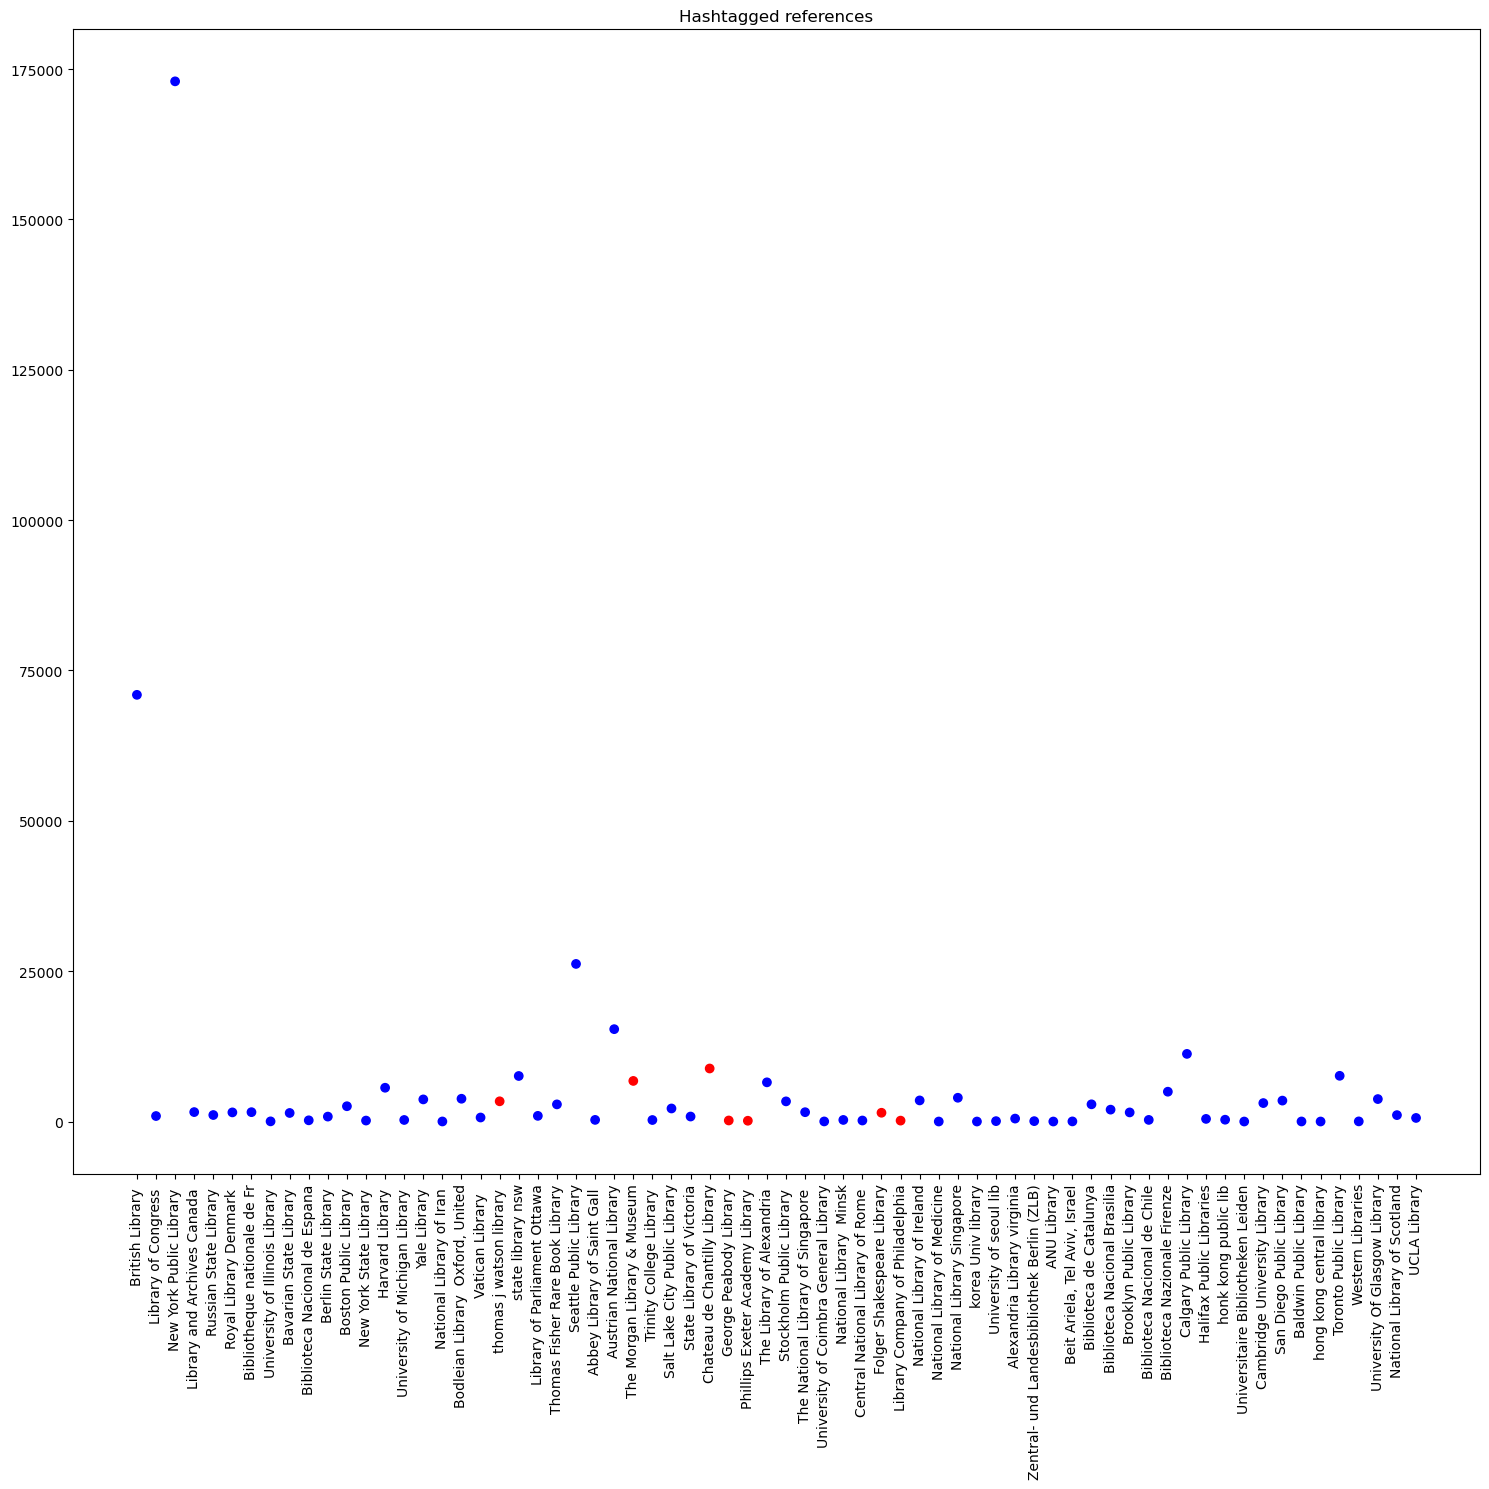

In [156]:
colors = {'Private/Donations': 'red', 'Government/State Run': 'blue'}
plt.scatter(x=df["Name"],y=df["Hashtagged"],c=[colors[f] for f in df['Funding Provider']])
plt.title("Hashtagged references")
names = list(df['Name'])

# create a tick for each name on the x-axis
plt.xticks(range(len(names)), names)

# rotate the ticks to avoid overlapping
plt.xticks(rotation=90)

plt.show()

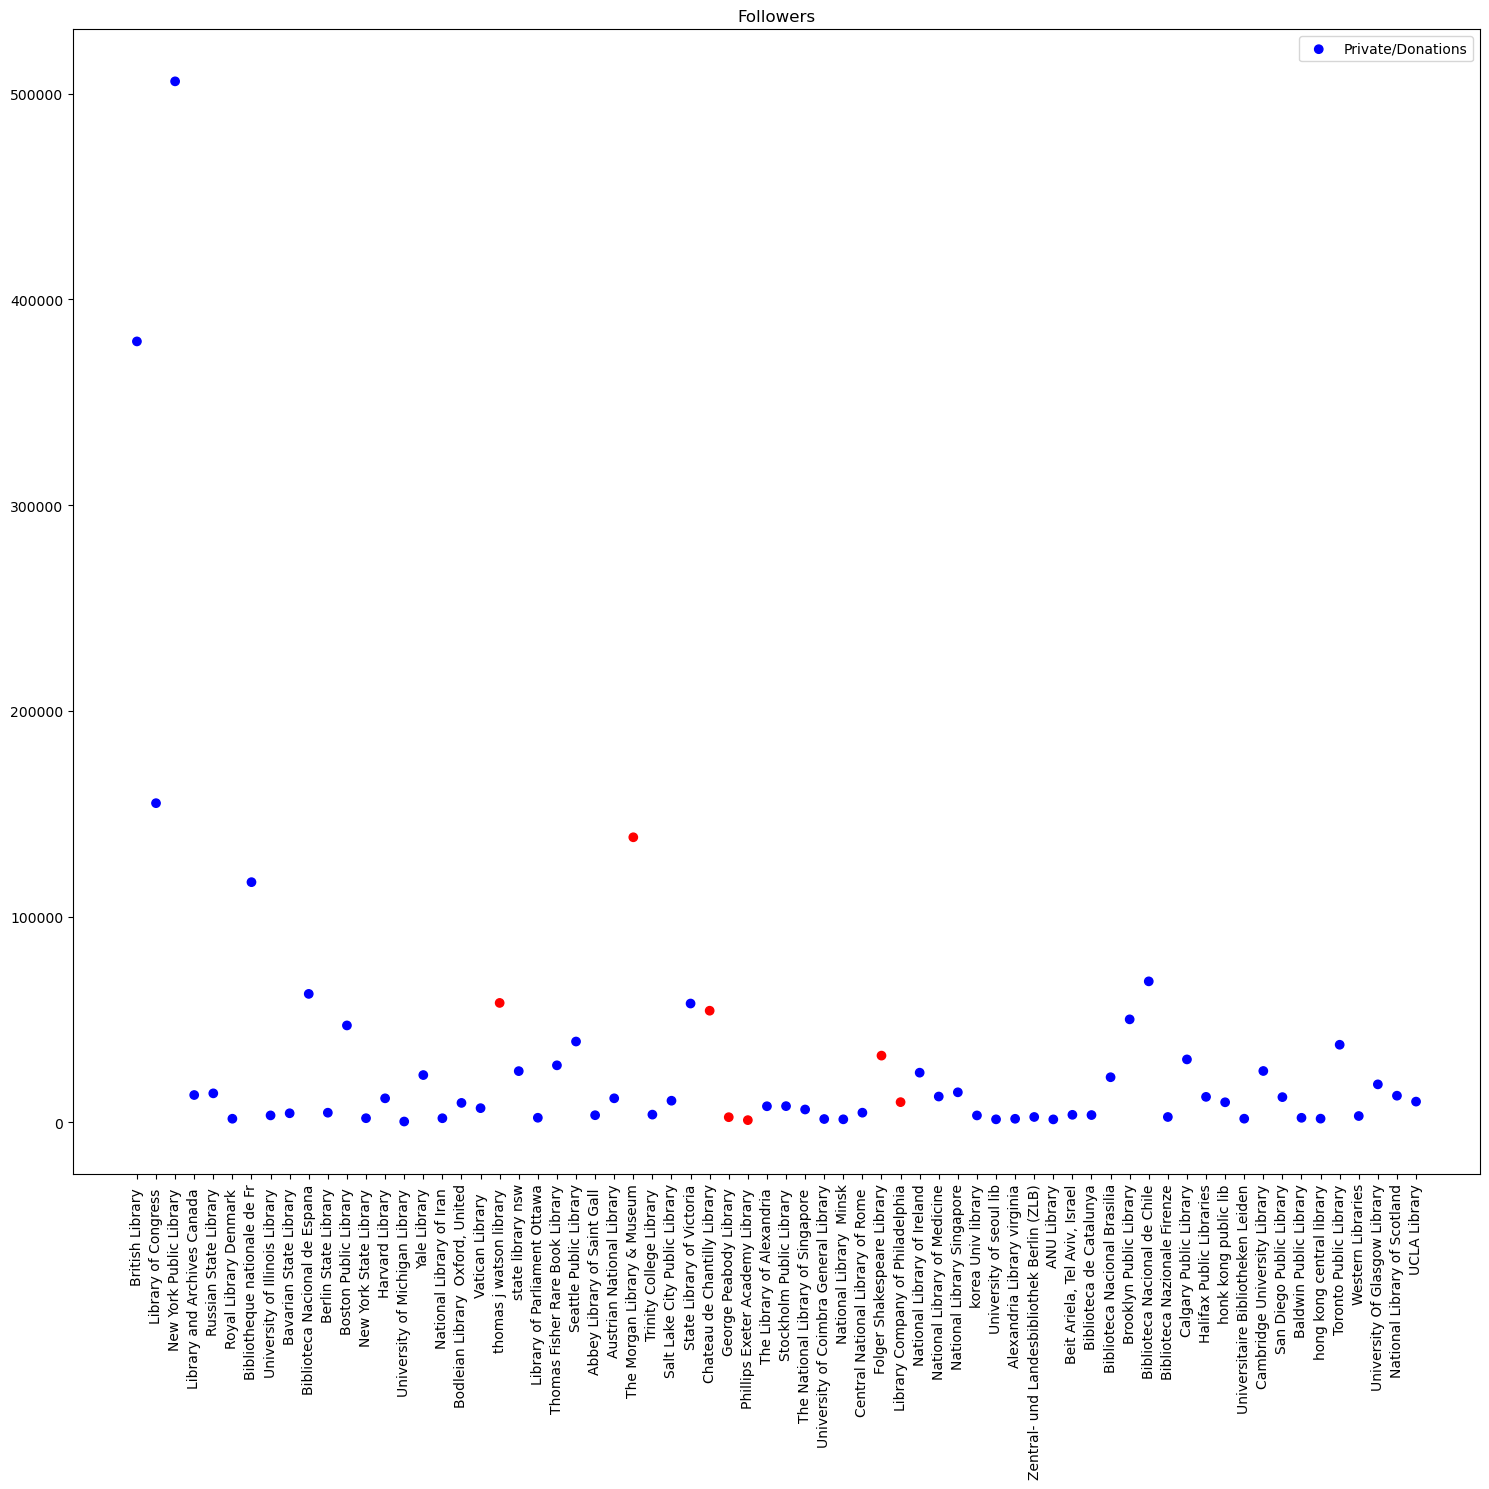

In [160]:
colors = {'Private/Donations': 'red', 'Government/State Run': 'blue'}
plt.scatter(x=df["Name"],y=df["Followers"],c=[colors[f] for f in df['Funding Provider']])
plt.title("Followers")
plt.legend(colors)
names = list(df['Name'])

# create a tick for each name on the x-axis
plt.xticks(range(len(names)), names)

# rotate the ticks to avoid overlapping
plt.xticks(rotation=90)

plt.show()

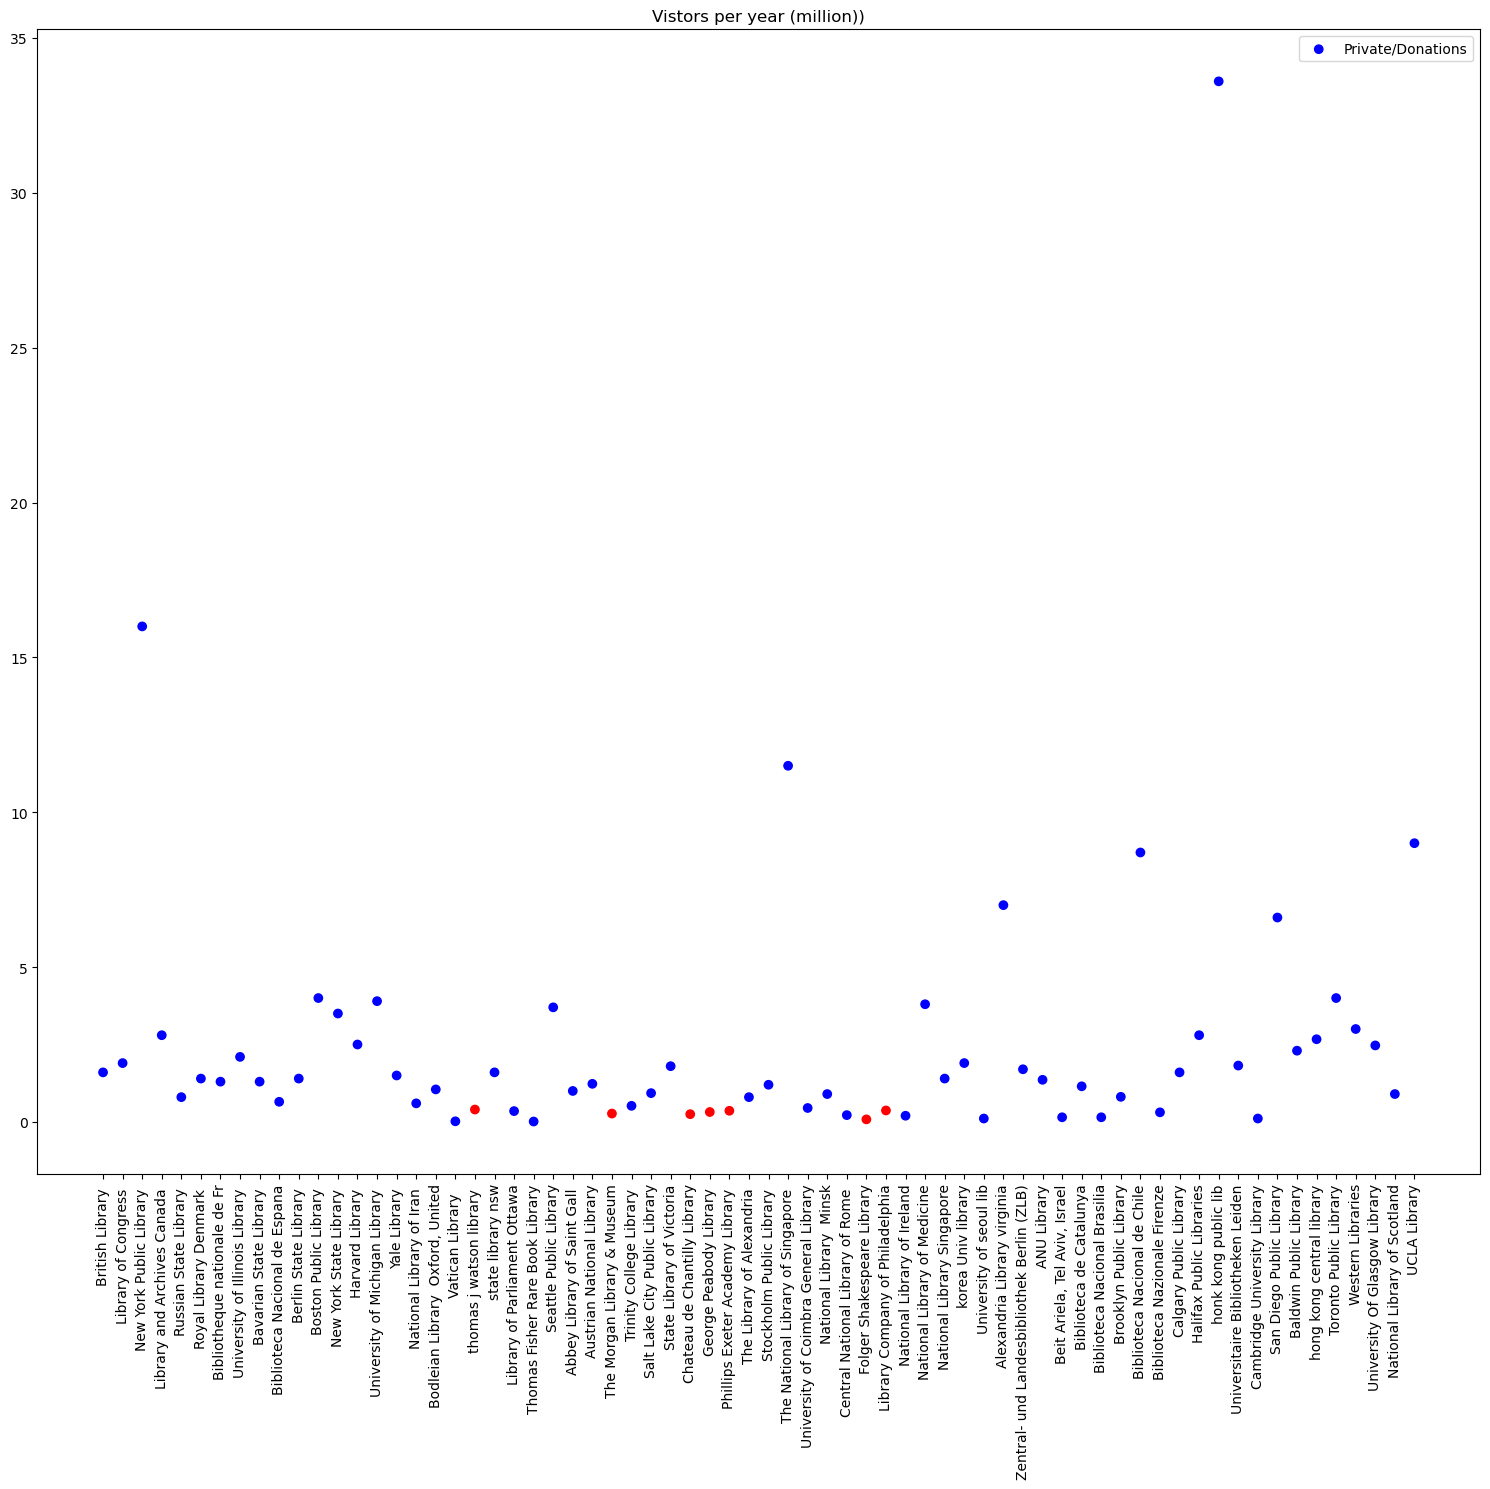

In [161]:
colors = {'Private/Donations': 'red', 'Government/State Run': 'blue'}
plt.scatter(x=df["Name"],y=df["number of vistors per year(million)"],c=[colors[f] for f in df['Funding Provider']])
names = list(df['Name'])
plt.title("Vistors per year (million))")
plt.legend(colors)


# create a tick for each name on the x-axis
plt.xticks(range(len(names)), names)

# rotate the ticks to avoid overlapping
plt.xticks(rotation=90)

plt.show()

In [ ]:
'''
G1=nx.DiGraph()

for j in range(0,dfgen.shape[0]):
    G1.add_node(df["Instagram user"][j])

def adding(df,libname):
    df.insert(len(df.columns),"{lname}".format(lname=libname),0)
    return df
    
dffolgen=dfgen.copy()

for j in range(0,dfgen.shape[0]):
    dffolgen=adding(dffolgen,dfgen.iloc[j,1])

    

#fig = plt.figure(6, figsize=(200, 200))
#fig=plt.figure(figsize=(200,200))
nx.draw(G1,with_labels=True,node_size=150,font_size=7)
plt.show()
'''